# Created by:
## Shubhnoor Gill
## UID: 18BCS6061
## B.E. CSE(AIML-1)
## Group: B

# Case Study: Practical 1 & 2

In this case study we are given cancer_mortality dataset. Our goal is to predict cancer mortality rates for US countries. 
In order to achieve our goal, we need to build a **multivariate Ordinary Least Squares regression model** to predict “ TARGET_deathRate” as per the given instructions.

**Goal:** To predict cancer mortality rates for US countries

**Target variable:** TARGET_deathRate

So let us start with our analysis.

# Load Data and libraries

The first step towards model builiding is to load data and as well as load the libraries required to deal with our data. So, let us see it.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np   # library for dealing with arrays and matrix operations
import pandas as pd  # library for data manipulation and analysis

In [3]:
# Loading data into a cancer_mortality dataFrame
cancer_mortality = pd.read_csv('https://query.data.world/s/xlh353wvypzveoxm7h4u4c6hnucftk',encoding='ISO-8859-1')

# Data Understanding

Let us first understand and explore our data.

In [4]:
# Displaying the first five rows
cancer_mortality.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0       1397.0               469             164.9          489.8      61898   
1        173.0                70             161.3          411.6      48127   
2        102.0                50             174.7          349.7      49348   
3        427.0               202             194.8          430.4      44243   
4         57.0                26             144.4          350.1      49955   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0      260131            11.2   499.748204   (61494.5, 125635]       39.3   
1       43269            18.6    23.111234  (48021.6, 51046.4]       33.0   
2       21026            14.6    47.560164  (48021.6, 51046.4]       45.0   
3       75882            17.1   342.637253    (42724.4, 45201]       42.8   
4       10321            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPrivateCoverageAlone  PctEmpPrivCoverage PctPublicCoverage  \
0  ...                      NaN                41.6              32.9   
1  ...                     53.8                43.6              31.1   
2  ...                     43.5                34.9              42.1   
3  ...                     40.3                35.0              45.3   
4  ...                     43.9                35.1              44.0   

   PctPublicCoverageAlone   PctWhite  PctBlack  PctAsian  PctOtherRace  \
0                    14.0  81.780529  2.594728  4.821857      1.843479   
1                    15.3  89.228509  0.969102  2.246233      3.741352   
2                    21.1  90.922190  0.739673  0.465898      2.747358   
3                    25.0  91.744686  0.782626  1.161359      1.362643   
4                    22.7  94.104024  0.270192  0.665830      0.492135   

   PctMarriedHouseholds  BirthRate  
0             52.856076   6.118831  
1             45.372500   4.333096  
2             54.444868   3.729488  
3             51.021514   4.603841  
4             54.027460   6.796657  

[5 rows x 34 columns]

In [5]:
# Checking number of rows and columns in cancer_mortality data
cancer_mortality.shape

(3047, 34)

In our cancer_mortality dataframe we have 3047 rows and 34 columns

In [6]:
# Describe all the continous and categorical variables
cancer_mortality.describe(include='all')

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
count    3047.000000       3047.000000       3047.000000    3047.000000   
unique           NaN               NaN               NaN            NaN   
top              NaN               NaN               NaN            NaN   
freq             NaN               NaN               NaN            NaN   
mean      606.338544        185.965868        178.664063     448.268586   
std      1416.356223        504.134286         27.751511      54.560733   
min         6.000000          3.000000         59.700000     201.300000   
25%        76.000000         28.000000        161.200000     420.300000   
50%       171.000000         61.000000        178.100000     453.549422   
75%       518.000000        149.000000        195.200000     480.850000   
max     38150.000000      14010.000000        362.800000    1206.900000   

            medIncome    popEst2015  povertyPercent  studyPerCap  \
count     3047.000000  3.047000e+03     3047.000000  3047.000000   
unique            NaN           NaN             NaN          NaN   
top               NaN           NaN             NaN          NaN   
freq              NaN           NaN             NaN          NaN   
mean     47063.281917  1.026374e+05       16.878175   155.399415   
std      12040.090836  3.290592e+05        6.409087   529.628366   
min      22640.000000  8.270000e+02        3.200000     0.000000   
25%      38882.500000  1.168400e+04       12.150000     0.000000   
50%      45207.000000  2.664300e+04       15.900000     0.000000   
75%      52492.000000  6.867100e+04       20.400000    83.650776   
max     125635.000000  1.017029e+07       47.400000  9762.308998   

                 binnedInc    MedianAge  ...  PctPrivateCoverageAlone  \
count                 3047  3047.000000  ...              2438.000000   
unique                  10          NaN  ...                      NaN   
top     (54545.6, 61494.5]          NaN  ...                      NaN   
freq                   306          NaN  ...                      NaN   
mean                   NaN    45.272333  ...                48.453774   
std                    NaN    45.304480  ...                10.083006   
min                    NaN    22.300000  ...                15.700000   
25%                    NaN    37.700000  ...                41.000000   
50%                    NaN    41.000000  ...                48.700000   
75%                    NaN    44.000000  ...                55.600000   
max                    NaN   624.000000  ...                78.900000   

        PctEmpPrivCoverage PctPublicCoverage  PctPublicCoverageAlone  \
count          3047.000000       3047.000000             3047.000000   
unique                 NaN               NaN                     NaN   
top                    NaN               NaN                     NaN   
freq                   NaN               NaN                     NaN   
mean             41.196324         36.252642               19.240072   
std               9.447687          7.841741                6.113041   
min              13.500000         11.200000                2.600000   
25%              34.500000         30.900000               14.850000   
50%              41.100000         36.300000               18.800000   
75%              47.700000         41.550000               23.100000   
max              70.700000         65.100000               46.600000   

           PctWhite     PctBlack     PctAsian  PctOtherRace  \
count   3047.000000  3047.000000  3047.000000   3047.000000   
unique          NaN          NaN          NaN           NaN   
top             NaN          NaN          NaN           NaN   
freq            NaN          NaN          NaN           NaN   
mean      83.645286     9.107978     1.253965      1.983523   
std       16.380025    14.534538     2.610276      3.517710   
min       10.199155     0.000000     0.000000      0.000000   
25%       77.296180     0.620675     0.254199

In [7]:
# Checking the datatypes of variables
cancer_mortality.dtypes

avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                    int64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          float64
PctPublicCoverageAlone     float64
PctWhite            

Out of 34 columns we have two columns having categorical variables: Geography and binnedInc
Rest all columns have continous variables

# Data Visualisation
Let's now spend some time doing by visualising our data to understand more about it.
- We can check if mullticollinearity exits or not in dataset.
- We can identify if predictors directly have a strong association with the outcome variable by observing the plots.
- We can also figure out skewness and outliers from plots.

We will visualise our data using `matplotlib` and `seaborn` libraries.

In [8]:
# Importing libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

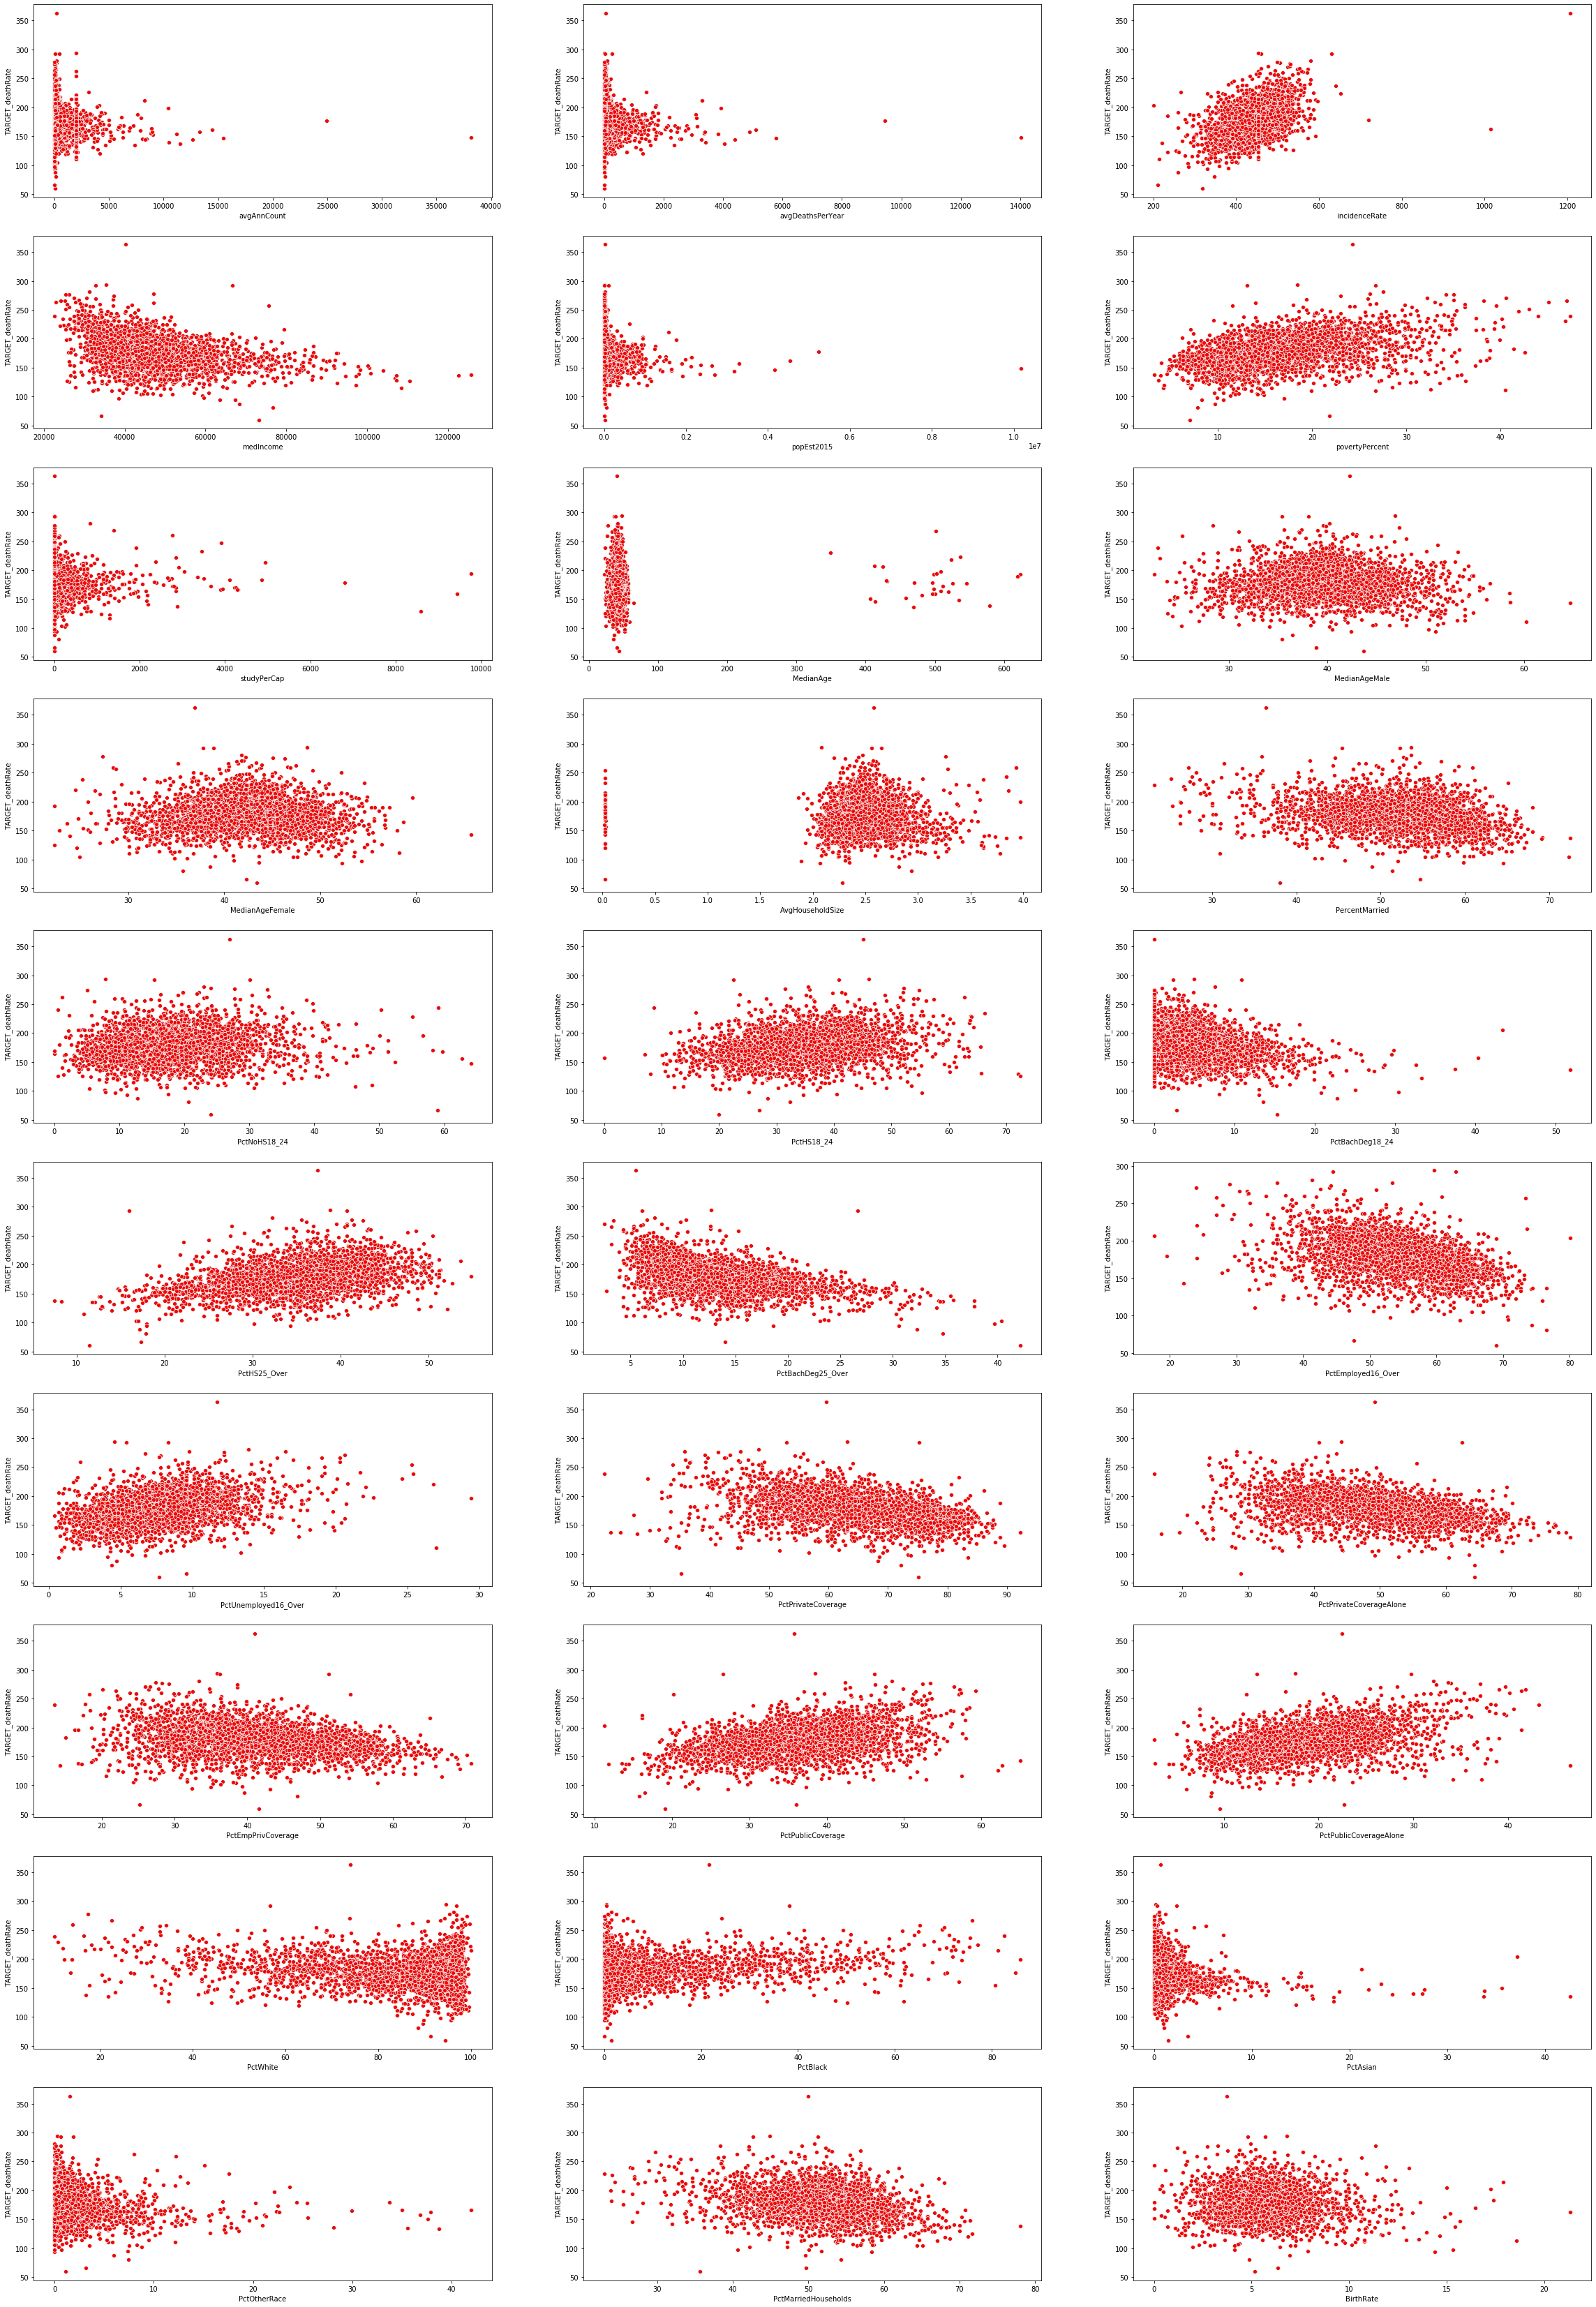

In [9]:
# Plot scatterplots for numerical features
plt.figure(figsize=(40,60))
index=1
column=['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale',  'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate']
for col in cancer_mortality[column]:
  plt.subplot(10,3,index)
  sns.scatterplot(x = col, y = 'TARGET_deathRate', data = cancer_mortality, color='r')
  index+=1

We can observe that the data has many outliers. We will deal and treat them ahead.

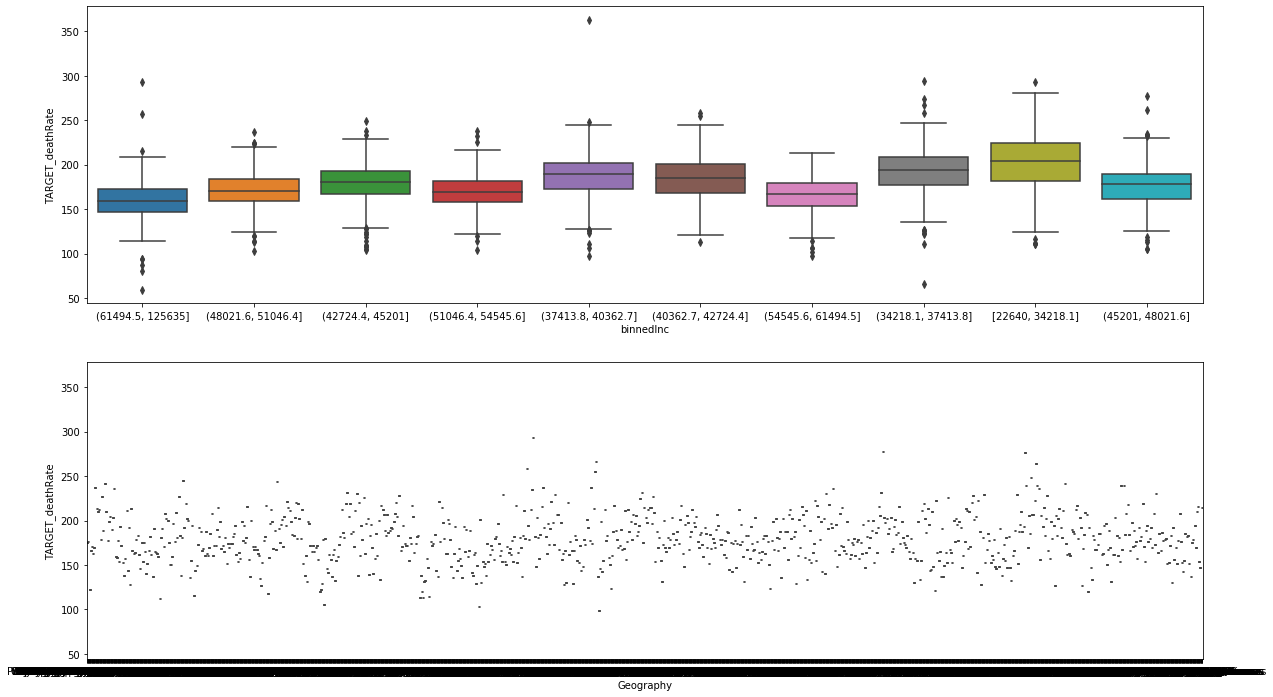

In [10]:
# Plot boxplots for categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,1,1)
sns.boxplot(x = 'binnedInc', y = 'TARGET_deathRate', data = cancer_mortality)
plt.subplot(2,1,2)
sns.boxplot(x = 'Geography', y = 'TARGET_deathRate', data = cancer_mortality)
plt.show()

### Check Correlation between all the numeric variables

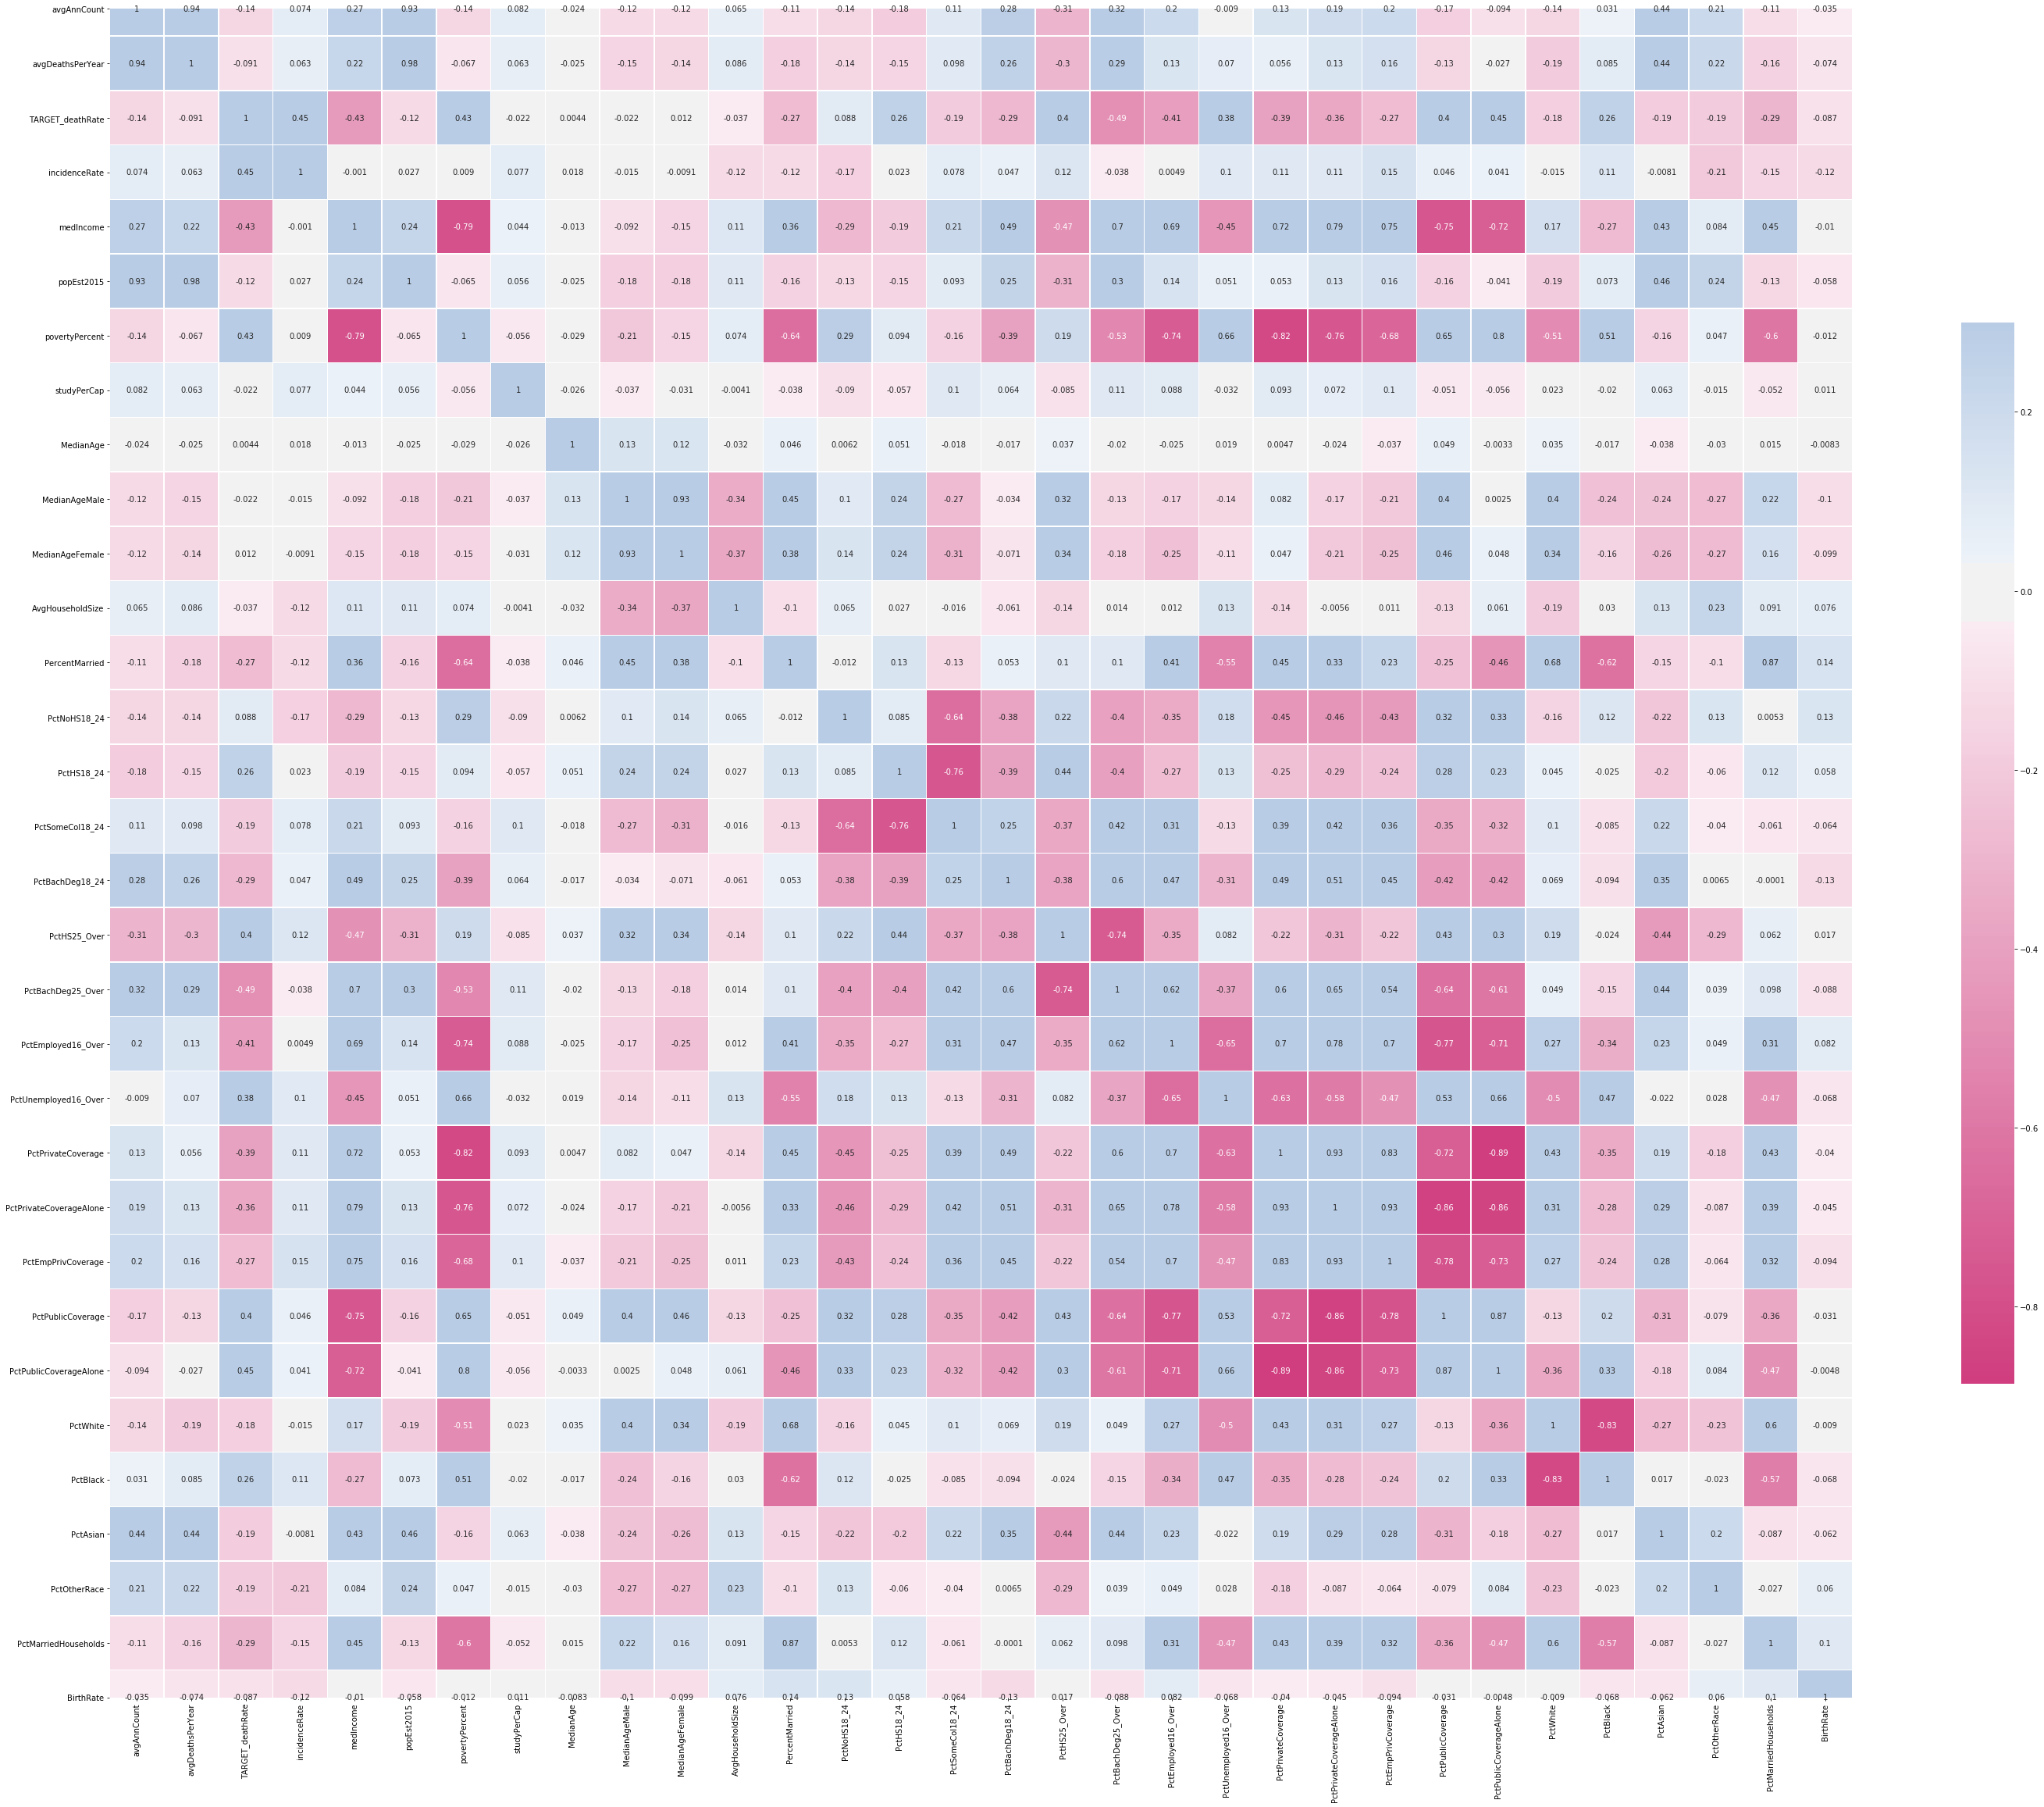

In [11]:
# Plotting a correlation matrix using heatmap
corr = cancer_mortality.corr() # Compute the correlation matrix
f, ax = plt.subplots(figsize=(50, 50)) # Set up the matplotlib figure size
cmap = sns.diverging_palette(350, 250, as_cmap=True) # Generate a custom diverging colormap
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}) # Draw the heatmap

We can see from the above heatmap that the boxes shaded with:
<br>=> Dark pink color have high negative correlation
<br>=> Blue color have positive correlation
<br>We can also observe that in our data, multicollinearity does exist.
<br>Highly positive correlated variables(>=0.4) with predictor variable “ TARGET_deathRate” are : “incidenceRate”, “povertyPercent”, “PctEmployed16_Over”, “PctPublicCoverage”, “PctPublicCoverageAlone”, “PctOtherRace”.

# Data Cleaning and Data Transformation

### Data cleaning and data transformation is the main part. In this step we will be performing three processes:
- Checking missing values and treating them by either deleting the column/rows or replacing them with mean
- Identifying the outliers and treating them
- Check the skewness and then convert the skewed data to symmetric form i.e. data transformation.

### Checking the percentage of missing values

In [12]:
# Checking the missing values and their percentage in the cancer_mortality dataset
missing=cancer_mortality.isnull().sum()
percent_missing = round(missing * 100 / len(cancer_mortality)) 
missing_value_df = pd.DataFrame({ 'missing_count':missing,
                                 'percent_missing': percent_missing})
missing_value_df

missing_count  percent_missing
avgAnnCount                          0              0.0
avgDeathsPerYear                     0              0.0
TARGET_deathRate                     0              0.0
incidenceRate                        0              0.0
medIncome                            0              0.0
popEst2015                           0              0.0
povertyPercent                       0              0.0
studyPerCap                          0              0.0
binnedInc                            0              0.0
MedianAge                            0              0.0
MedianAgeMale                        0              0.0
MedianAgeFemale                      0              0.0
Geography                            0              0.0
AvgHouseholdSize                     0              0.0
PercentMarried                       0              0.0
PctNoHS18_24                         0              0.0
PctHS18_24                           0              0.0
PctSomeCol18_24                   2285             75.0
PctBachDeg18_24                      0              0.0
PctHS25_Over                         0              0.0
PctBachDeg25_Over                    0              0.0
PctEmployed16_Over                 152              5.0
PctUnemployed16_Over                 0              0.0
PctPrivateCoverage                   0              0.0
PctPrivateCoverageAlone            609             20.0
PctEmpPrivCoverage                   0              0.0
PctPublicCoverage                    0              0.0
PctPublicCoverageAlone               0              0.0
PctWhite                             0              0.0
PctBlack                             0              0.0
PctAsian                             0              0.0
PctOtherRace                         0              0.0
PctMarriedHouseholds                 0              0.0
BirthRate                            0              0.0

We see that approx 75% of values are missing in PctSomeCol18_24 column. So we can drop this column
<br>Also we see that approx 5% of PctEmployed16_Over values and approx 20% PctPrivateCoverageAlone values are missing.



We can see from the description of dataframe that the PctEmployed16_Over values and PctPrivateCoverageAlone values lie near to the mean. Hence, we replace the values with their means.

### Treating the missing values

In [13]:
# Dropping the PctSomeCol18_24 column
cancer_mortality.drop(['PctSomeCol18_24'], axis = 1, inplace = True) 

In [14]:
# Filling PctEmployed16_Over column null values with mean
cancer_mortality['PctEmployed16_Over'].fillna((cancer_mortality['PctEmployed16_Over'].mean()), inplace=True)

In [15]:
# Filling PctPrivateCoverageAlone column null values with mean
cancer_mortality['PctPrivateCoverageAlone'].fillna((cancer_mortality['PctPrivateCoverageAlone'].mean()), inplace=True)

In [16]:
# Again checking if there are missing values
cancer_mortality.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

We can observe that there is no missing value present in our data.

### Removing outliers from MedianAge column

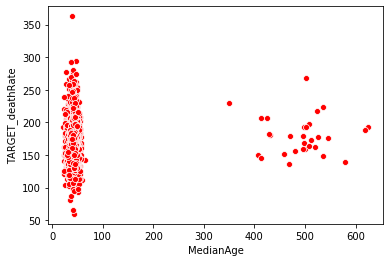

In [17]:
# Plot a scatter plot for MedianAge
sns.scatterplot(x = 'MedianAge', y = 'TARGET_deathRate', data = cancer_mortality,color='r')
plt.show()

We can see from the above scatterplot that the MedianAge has values above 300. This cannot be possible, as a person cannot live for 300 or more years. So, these are the outliers.

The MedianAge is the average of MedianAgeMale and MedianAgeFemale. The maximum value of MedianAgeMale	and MedianAgeFemale is 64.7 and 65.7 respectively. So, the maximum MedianAge can be 65.3.
So, we replace the indices where outliers i.e MedianAge is greater than 65.3

In [18]:
# Get the indices where outliers i.e MedianAge is greater than 65.3 
medianage_outliers=list(cancer_mortality.loc[(cancer_mortality["MedianAge"]>65.3), :].index)
cancer_mortality.loc[medianage_outliers,['MedianAge','MedianAgeMale','MedianAgeFemale']]

MedianAge  MedianAgeMale  MedianAgeFemale
100       458.4           36.3             40.7
181       469.2           37.6             40.1
225       546.0           44.2             46.7
318       624.0           51.6             52.5
425       508.8           41.5             43.4
606       619.2           52.3             50.7
637       498.0           40.4             42.4
843       412.8           33.0             35.6
991       481.2           39.4             41.4
1199      424.8           34.2             36.8
1312      535.2           44.7             44.4
1406      406.8           33.3             34.4
1579      579.6           48.2             48.5
1725      502.8           40.7             43.5
1736      496.8           39.2             43.1
1744      525.6           41.6             46.2
1767      519.6           42.0             44.5
1855      536.4           42.8             45.2
2000      523.2           42.4             45.4
2108      470.4           37.7             40.5
2132      430.8           32.3             39.2
2391      414.0           33.3             35.6
2422      500.4           41.4             42.1
2431      429.6           33.5             37.2
2589      501.6           39.9             43.3
2668      496.8           38.9             44.8
2789      349.2           28.9             29.3
2835      511.2           41.0             43.9
2895      498.0           40.1             43.1
2966      508.8           41.6             43.2

In [19]:
# Replace the indices where outliers i.e MedianAge is greater than 65.3 with the average of MedianAgeMale and MedianAgeFemale values.
cancer_mortality['MedianAge']  = cancer_mortality[['MedianAgeMale','MedianAgeFemale']].mean(axis=1).round(1)
cancer_mortality.loc[medianage_outliers,['MedianAge','MedianAgeMale','MedianAgeFemale']]

MedianAge  MedianAgeMale  MedianAgeFemale
100        38.5           36.3             40.7
181        38.8           37.6             40.1
225        45.4           44.2             46.7
318        52.0           51.6             52.5
425        42.4           41.5             43.4
606        51.5           52.3             50.7
637        41.4           40.4             42.4
843        34.3           33.0             35.6
991        40.4           39.4             41.4
1199       35.5           34.2             36.8
1312       44.6           44.7             44.4
1406       33.8           33.3             34.4
1579       48.4           48.2             48.5
1725       42.1           40.7             43.5
1736       41.2           39.2             43.1
1744       43.9           41.6             46.2
1767       43.2           42.0             44.5
1855       44.0           42.8             45.2
2000       43.9           42.4             45.4
2108       39.1           37.7             40.5
2132       35.8           32.3             39.2
2391       34.4           33.3             35.6
2422       41.8           41.4             42.1
2431       35.4           33.5             37.2
2589       41.6           39.9             43.3
2668       41.8           38.9             44.8
2789       29.1           28.9             29.3
2835       42.4           41.0             43.9
2895       41.6           40.1             43.1
2966       42.4           41.6             43.2

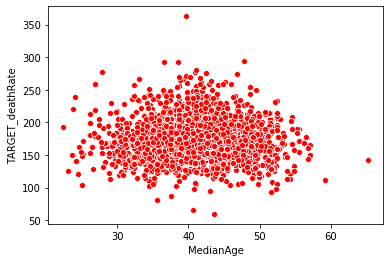

In [20]:
# Plot scatterplot for MedianAge
sns.scatterplot(x = 'MedianAge', y = 'TARGET_deathRate', data = cancer_mortality, color='r')
plt.show()

We analyse that many outliers have been treated in MedianAge column.

### Now check the skewness by visualing the data and remove it using transformations.

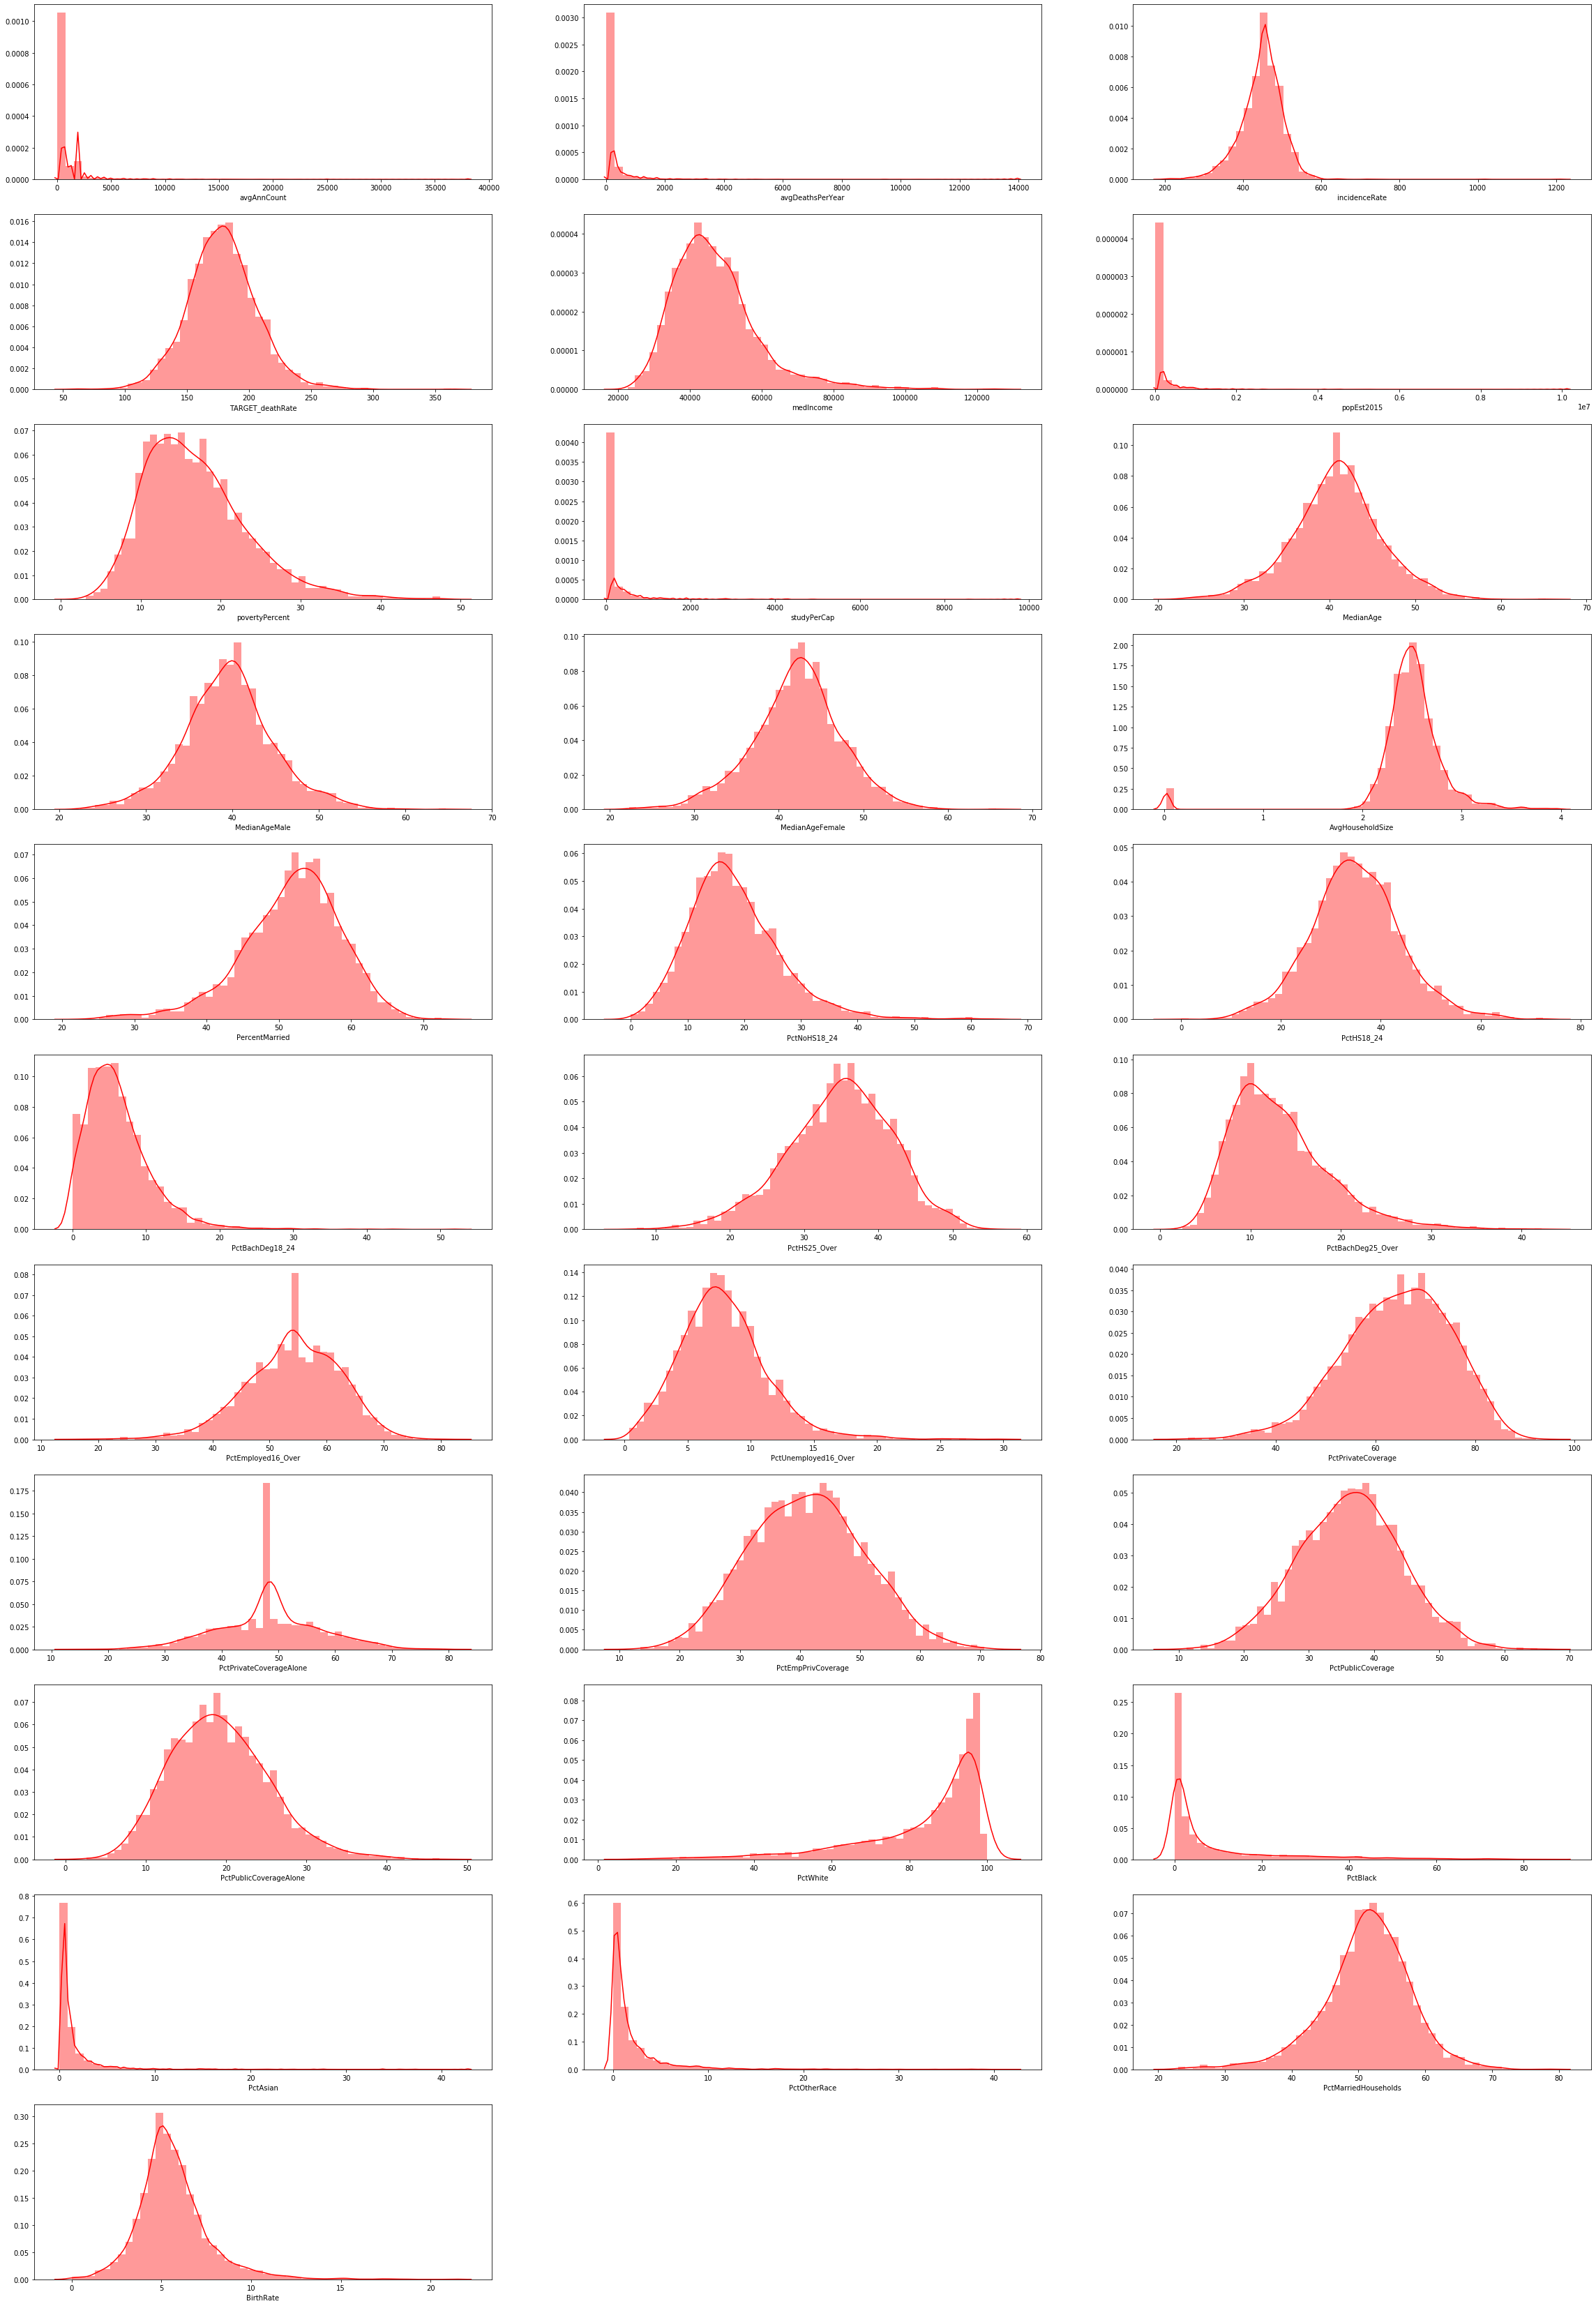

In [21]:
# Plot distplots for numerical variables to check the skewness 
plt.figure(figsize=(40,60))
index=1
column=['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate','TARGET_deathRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale',  'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate']
for col in cancer_mortality[column]:
  plt.subplot(11,3,index)
  sns.distplot(cancer_mortality[col],bins=50, color='r')
  index+=1

In [22]:
# Checking the skewness along the index axis 
cancer_mortality.skew(axis = 0, skipna = True).round(2)

avgAnnCount                10.68
avgDeathsPerYear           11.95
TARGET_deathRate            0.27
incidenceRate               0.77
medIncome                   1.41
popEst2015                 14.29
povertyPercent              0.93
studyPerCap                 8.71
MedianAge                  -0.05
MedianAgeMale               0.13
MedianAgeFemale            -0.21
AvgHouseholdSize           -3.38
PercentMarried             -0.65
PctNoHS18_24                0.97
PctHS18_24                  0.18
PctBachDeg18_24             1.96
PctHS25_Over               -0.33
PctBachDeg25_Over           1.09
PctEmployed16_Over         -0.40
PctUnemployed16_Over        0.89
PctPrivateCoverage         -0.39
PctPrivateCoverageAlone    -0.01
PctEmpPrivCoverage          0.09
PctPublicCoverage          -0.01
PctPublicCoverageAlone      0.47
PctWhite                   -1.68
PctBlack                    2.26
PctAsian                    7.42
PctOtherRace                4.95
PctMarriedHouseholds       -0.52
BirthRate 

### From the above values we can see that there are many columns having high skewness i.e 
- High positive values show that the data is right skewed
- High negative values show that the data is left skewed
<br>**So we try to reduce the skewness by applying log, square root, cube root and square transformations**

In [23]:
# Applying log transformation on some columns to reduce positive skewness
index=1
column=['avgAnnCount','avgDeathsPerYear','medIncome',
        'popEst2015','studyPerCap','PctBachDeg25_Over',
        'PctBlack','PctAsian','PctOtherRace']

for col in cancer_mortality[column]:
    cancer_mortality[col] = cancer_mortality[col].map(lambda i: np.log(i)if i > 0 else 0)

In [24]:
# Applying cube root transformation on povertyPercent to reduce positive skewness
cancer_mortality[col] = np.power(cancer_mortality['povertyPercent'],1/3)

In [25]:
# Applying square transformation on certain columns to reduce positive skewness
index=1
column=['AvgHouseholdSize','PercentMarried','PctHS25_Over',
        'PctEmployed16_Over','PctPrivateCoverage', 'PctWhite']

for col in cancer_mortality[column]:
    cancer_mortality[col] = cancer_mortality[col].map(lambda i: np.power(i,2) if i > 0 else 0)

In [26]:
# Applying square root transformation on certain columns to reduce negative skewness
index=1
column=['TARGET_deathRate','incidenceRate','PctNoHS18_24','PctBachDeg18_24',
        'PctUnemployed16_Over','PctPublicCoverageAlone','BirthRate']

for col in cancer_mortality[column]:
    cancer_mortality[col] = cancer_mortality[col].map(lambda i: np.sqrt(i))

In [27]:
# skewness along the index axis 
cancer_mortality.skew(axis = 0, skipna = True).round(2)

avgAnnCount                0.33
avgDeathsPerYear           0.41
TARGET_deathRate          -0.10
incidenceRate             -0.22
medIncome                  0.42
popEst2015                 0.50
povertyPercent             0.93
studyPerCap                0.87
MedianAge                 -0.05
MedianAgeMale              0.13
MedianAgeFemale           -0.21
AvgHouseholdSize           0.05
PercentMarried            -0.16
PctNoHS18_24               0.04
PctHS18_24                 0.18
PctBachDeg18_24           -0.03
PctHS25_Over               0.26
PctBachDeg25_Over         -0.07
PctEmployed16_Over         0.08
PctUnemployed16_Over      -0.05
PctPrivateCoverage         0.05
PctPrivateCoverageAlone   -0.01
PctEmpPrivCoverage         0.09
PctPublicCoverage         -0.01
PctPublicCoverageAlone    -0.03
PctWhite                  -1.12
PctBlack                  -0.02
PctAsian                  -0.16
PctOtherRace               0.17
PctMarriedHouseholds      -0.52
BirthRate                  0.02
dtype: f

We can analyse that the skewness has decreased by a great factor. Now we again visualize our data

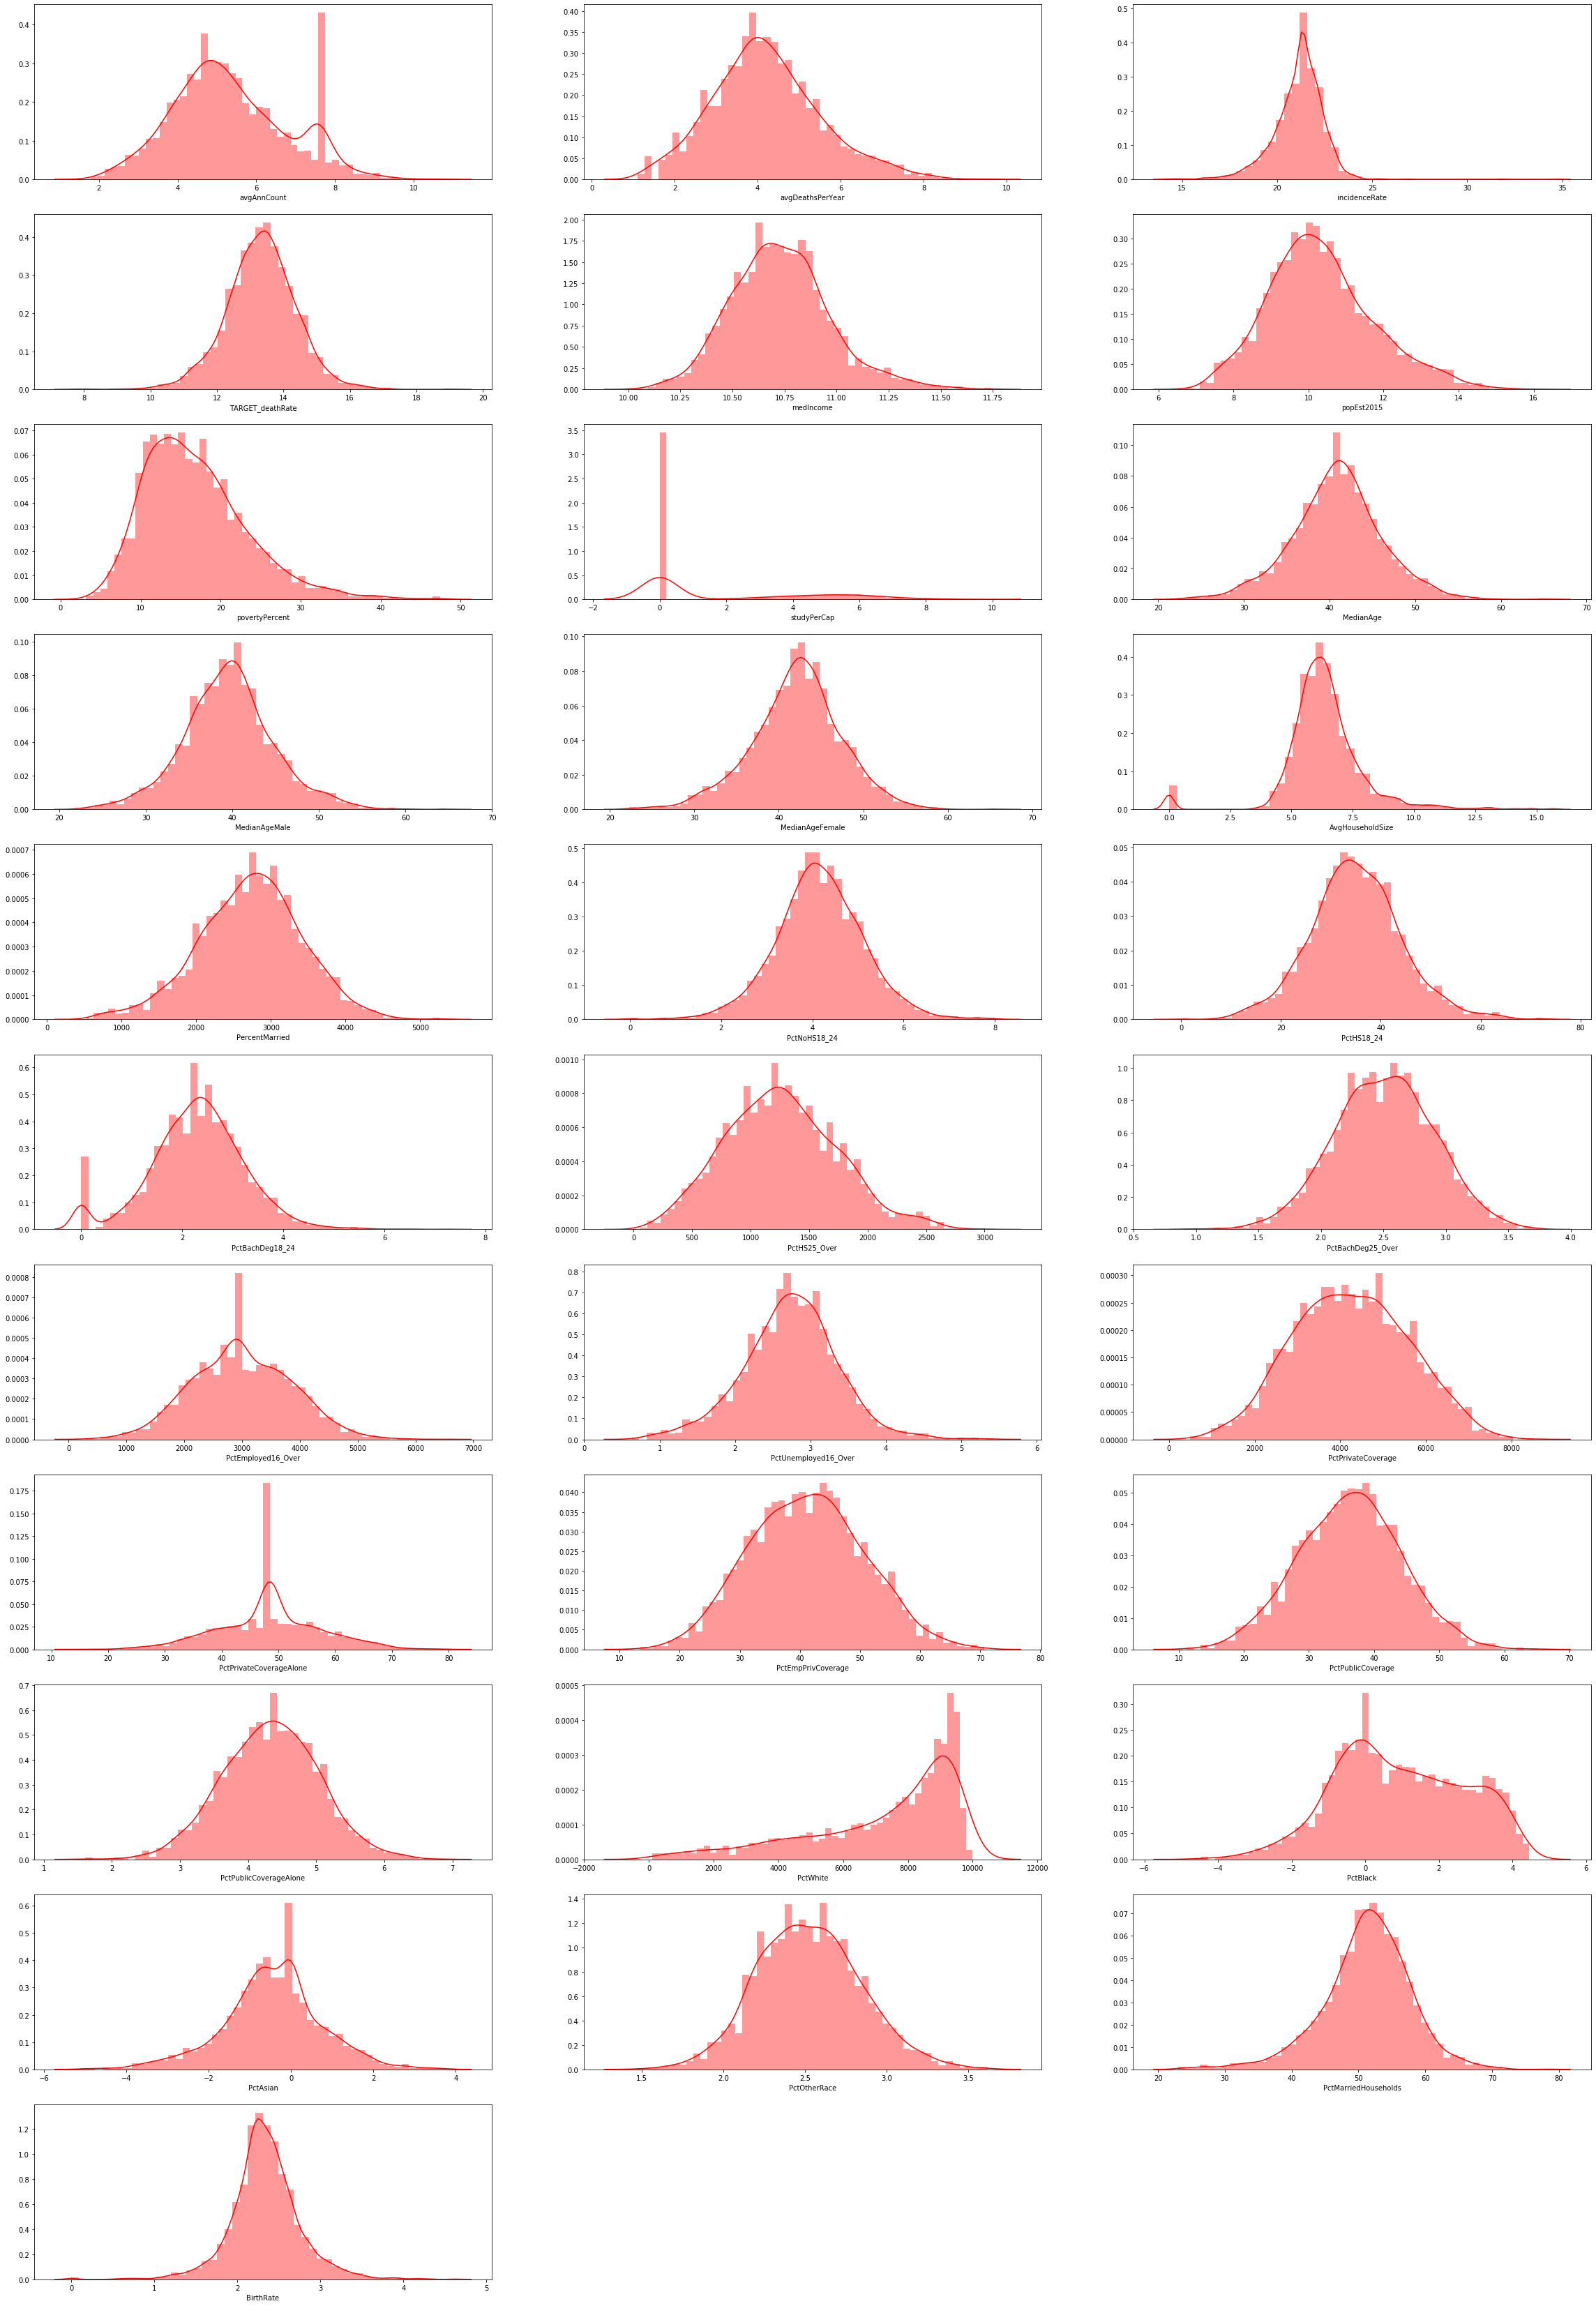

In [28]:
# Plot scatterplots for numerical features
plt.figure(figsize=(40,60))
index=1
column=['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate','TARGET_deathRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale',  'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate']
for col in cancer_mortality[column]:
  plt.subplot(11,3,index)
  sns.distplot(cancer_mortality[col],bins=50, color='r')
  index+=1

### Treating Outliers using IQR ( Inter Quartile Range) method

In [29]:
# find the quantiles over the index axis 
cancer_mortality.quantile([.1, .15, .25, .5, .75, .85, .90], axis = 0) 

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
0.10     3.610918          2.639057         12.058192      19.514610   
0.15     3.891820          2.890372         12.324772      19.967474   
0.25     4.330733          3.332205         12.696456      20.501219   
0.50     5.141664          4.110874         13.345411      21.296700   
0.75     6.249975          5.003946         13.971399      21.928292   
0.85     7.082128          5.533389         14.338759      22.257583   
0.90     7.582060          5.935951         14.606163      22.524209   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
0.10  10.440332    8.664889            9.80     0.000000       34.4   
0.15  10.489320    8.945580           10.70     0.000000       35.8   
0.25  10.568300    9.365974           12.15     0.000000       37.8   
0.50  10.719007   10.190282           15.90     0.000000       41.0   
0.75  10.868416   11.137082           20.40     4.426649       43.9   
0.85  10.957275   11.820176           23.30     5.506247       45.8   
0.90  11.023903   12.244287           25.30     6.022977       47.4   

      MedianAgeMale  ...  PctPrivateCoverageAlone  PctEmpPrivCoverage  \
0.10          33.20  ...                36.700000               28.90   
0.15          34.59  ...                39.090000               31.00   
0.25          36.35  ...                43.100000               34.50   
0.50          39.60  ...                48.453774               41.10   
0.75          42.50  ...                53.800000               47.70   
0.85          44.60  ...                57.600000               51.30   
0.90          46.10  ...                60.400000               53.74   

      PctPublicCoverage  PctPublicCoverageAlone     PctWhite  PctBlack  \
0.10              26.10                3.435113  3651.145277 -1.128999   
0.15              28.00                3.591657  4498.436608 -0.817877   
0.25              30.90                3.853564  5974.700036 -0.357849   
0.50              36.30                4.335897  8110.762927  0.809852   
0.75              41.55                4.806246  9111.025854  2.352300   
0.85              44.20                5.050742  9343.828469  3.064314   
0.90              46.20                5.196152  9447.951138  3.413506   

      PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate  
0.10 -1.928980      2.139975             43.108770   1.887576  
0.15 -1.562145      2.203575             45.084767   1.988853  
0.25 -1.118195      2.298924             47.763063   2.126363  
0.50 -0.441339      2.514581             51.669941   2.319801  
0.75  0.199701      2.732394             55.395132   2.548269  
0.85  0.705205      2.856178             57.359375   2.693201  
0.90  1.034011      2.935667             58.666986   2.825538  

[7 rows x 31 columns]

In [30]:
# Set the quantile ranges and find the Inter Quartile Range i.e. IQR = (Q3 - Q1)
# We have chosen 0.15 and 0.85 quantile as the these ranges are quite close to 0.25 and 0.75 quantiles for most of the columns. 
# So, to avoid any data loss, we have chosen these values.
Q1 = cancer_mortality.quantile(0.15)
Q3 = cancer_mortality.quantile(0.85)
IQR = (Q3 - Q1)
print(IQR)

avgAnnCount                   3.190308
avgDeathsPerYear              2.643018
TARGET_deathRate              2.013987
incidenceRate                 2.290109
medIncome                     0.467956
popEst2015                    2.874596
povertyPercent               12.600000
studyPerCap                   5.506247
MedianAge                    10.000000
MedianAgeMale                10.010000
MedianAgeFemale              10.500000
AvgHouseholdSize              2.263500
PercentMarried             1397.250000
PctNoHS18_24                  1.823606
PctHS18_24                   17.800000
PctBachDeg18_24               1.728912
PctHS25_Over               1016.160000
PctBachDeg25_Over             0.836659
PctEmployed16_Over         1821.120000
PctUnemployed16_Over          1.210346
PctPrivateCoverage         2910.880000
PctPrivateCoverageAlone      18.510000
PctEmpPrivCoverage           20.300000
PctPublicCoverage            16.200000
PctPublicCoverageAlone        1.459085
PctWhite                 

In [31]:
# Apply the IQR method to treat outliers
cancer_mortality = cancer_mortality[~((cancer_mortality < (Q1 - 1.5 * IQR)) |(cancer_mortality > (Q3 + 1.5 * IQR))).any(axis=1)]
cancer_mortality.shape # Checking the rows and columns

(2880, 33)

### We see that now total 2880 rows and 33 columns are present in the cancer_mortality dataframe after treating the outliers.
Now we visualize our data again by plotting scatterplots after outlier treatment.

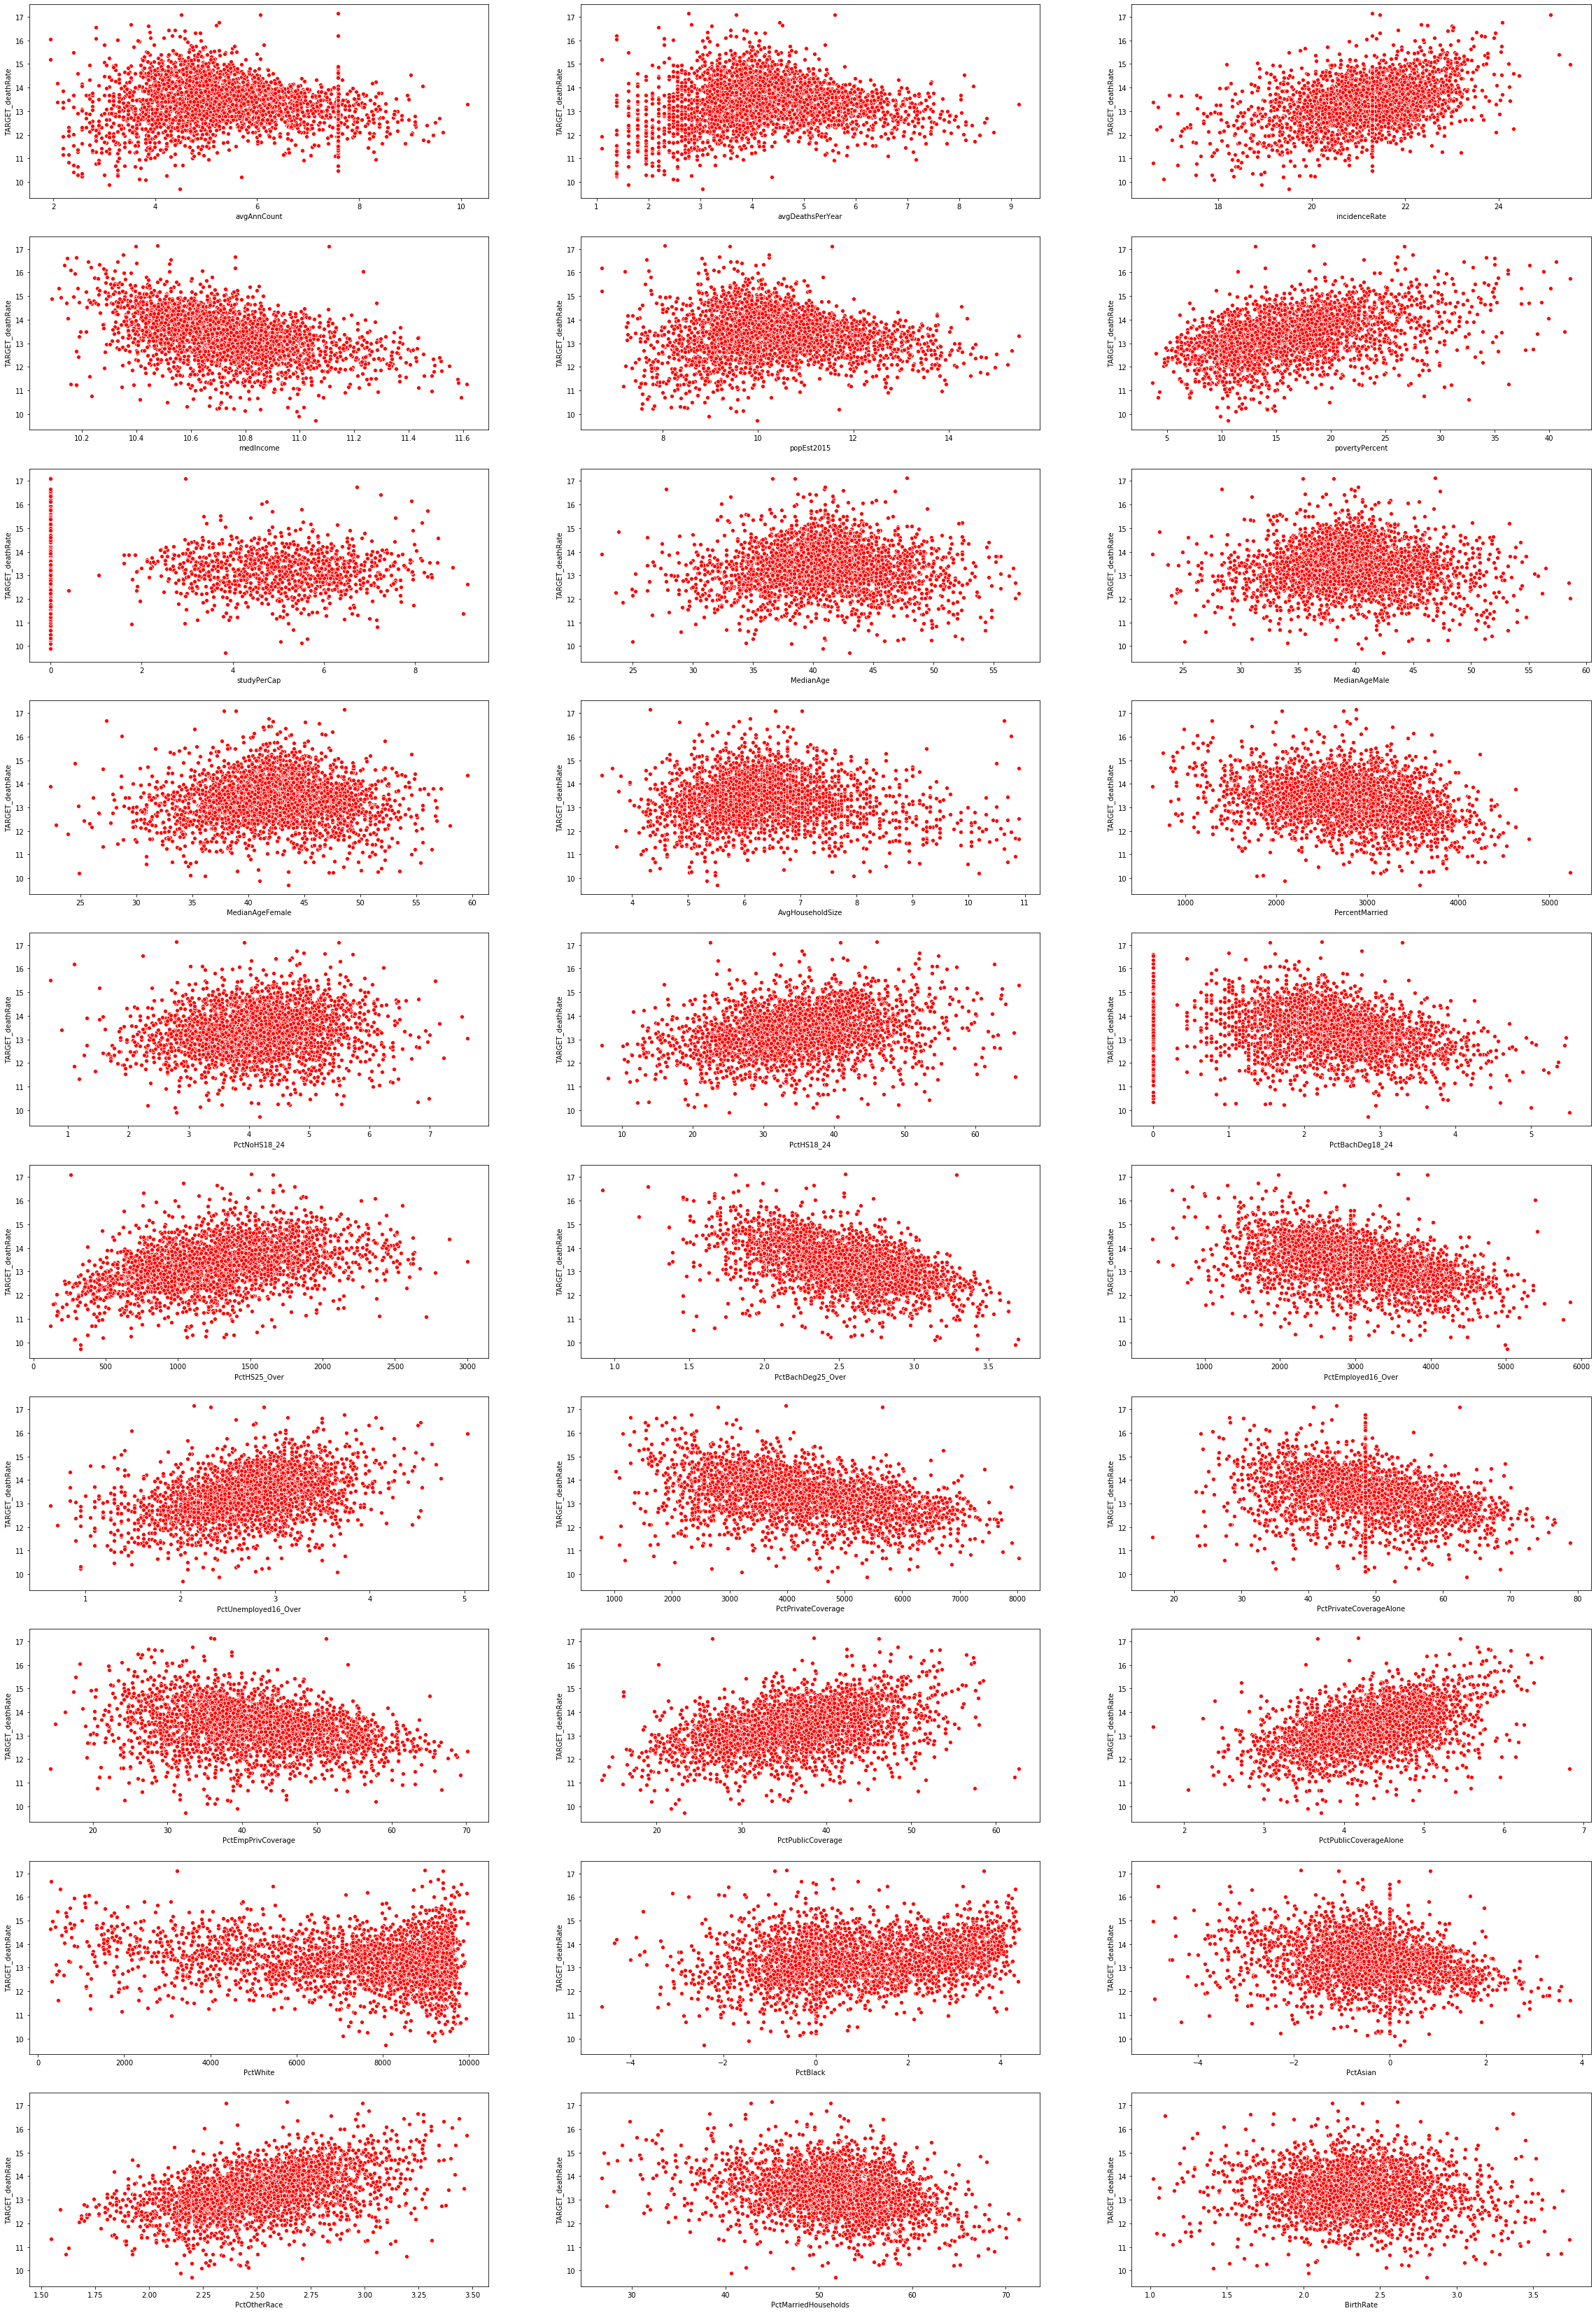

In [32]:
# Plot scatterplots for numerical features
plt.figure(figsize=(40,60))
index=1
column=['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale',  'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate']
for col in cancer_mortality[column]:
  plt.subplot(10,3,index)
  sns.scatterplot(x = col, y = 'TARGET_deathRate', data = cancer_mortality, color='r')
  index+=1


# Data Preparation

In this step, we deal with our two categorical variables: binnedInc and Geography

In [33]:
# It appears that the Geography column can be deconstructed into two variables, “Country/city” and “State”. This was done to add more information and increase the variability of the data.
cancer_mortality[["Country/City","State"]] = cancer_mortality.Geography.str.split(",",expand=True) 

In [34]:
# Drop the Geography column as it is no longer required.
cancer_mortality.drop(['Geography'], axis = 1, inplace = True) 

In [35]:
# Displaying the first five rows of cancer_mortality dataframe
cancer_mortality.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0     7.242082          6.150603         12.841339      22.131426  11.033243   
1     5.153292          4.248495         12.700394      20.287927  10.781599   
2     4.624973          3.912023         13.217413      18.700267  10.806653   
3     6.056784          5.308268         13.957077      20.746084  10.697452   
4     4.043051          3.258097         12.016655      18.710959  10.818878   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0   12.468941            11.2     6.214104   (61494.5, 125635]       39.3   
1   10.675192            18.6     3.140319  (48021.6, 51046.4]       33.0   
2    9.953515            14.6     3.861996  (48021.6, 51046.4]       44.9   
3   11.236935            17.1     5.836672    (42724.4, 45201]       42.8   
4    9.241936            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...  PctPublicCoverage  PctPublicCoverageAlone     PctWhite  PctBlack  \
0  ...               32.9                3.741657  6688.054855  0.953482   
1  ...               31.1                3.911521  7961.726845 -0.031385   
2  ...               42.1                4.593474  8266.844671 -0.301547   
3  ...               45.3                5.000000  8417.087499 -0.245100   
4  ...               44.0                4.764452  8855.567320 -1.308622   

   PctAsian  PctOtherRace  PctMarriedHouseholds  BirthRate      Country/City  \
0  1.573159      2.237378             52.856076   2.473627     Kitsap County   
1  0.809254      2.649543             45.372500   2.081609   Kittitas County   
2 -0.763788      2.444092             54.444868   1.931188  Klickitat County   
3  0.149591      2.576313             51.021514   2.145656      Lewis County   
4 -0.406720      2.320794             54.027460   2.607040    Lincoln County   

         State  
0   Washington  
1   Washington  
2   Washington  
3   Washington  
4   Washington  

[5 rows x 34 columns]

### Create Dummy Variables
The variable 'binnedInc' has 10 different categories. We need to convert these levels into integer by creating dummy variables. <br>We could have also chosen the other way i.e separate the bins in two parts and then create two columns with lower and higher range after converting them to float. But we will observe ahead that the binnedInc column does not help much in our model predictions and hence will drop these columns.

In [36]:
# Let's drop the first column from binned dataframe using 'drop_first = True'
binned = pd.get_dummies(cancer_mortality['binnedInc'], drop_first = True)

# Add the results to the original cancer_mortality dataframe
cancer_mortality = pd.concat([cancer_mortality, binned], axis = 1)

# Now let's see the first five rows of our dataframe
cancer_mortality.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0     7.242082          6.150603         12.841339      22.131426  11.033243   
1     5.153292          4.248495         12.700394      20.287927  10.781599   
2     4.624973          3.912023         13.217413      18.700267  10.806653   
3     6.056784          5.308268         13.957077      20.746084  10.697452   
4     4.043051          3.258097         12.016655      18.710959  10.818878   

   popEst2015  povertyPercent  studyPerCap           binnedInc  MedianAge  \
0   12.468941            11.2     6.214104   (61494.5, 125635]       39.3   
1   10.675192            18.6     3.140319  (48021.6, 51046.4]       33.0   
2    9.953515            14.6     3.861996  (48021.6, 51046.4]       44.9   
3   11.236935            17.1     5.836672    (42724.4, 45201]       42.8   
4    9.241936            12.5     0.000000  (48021.6, 51046.4]       48.3   

   ...        State  (37413.8, 40362.7]  (40362.7, 42724.4]  (42724.4, 45201]  \
0  ...   Washington                   0                   0                 0   
1  ...   Washington                   0                   0                 0   
2  ...   Washington                   0                   0                 0   
3  ...   Washington                   0                   0                 1   
4  ...   Washington                   0                   0                 0   

   (45201, 48021.6]  (48021.6, 51046.4]  (51046.4, 54545.6]  \
0                 0                   0                   0   
1                 0                   1                   0   
2                 0                   1                   0   
3                 0                   0                   0   
4                 0                   1                   0   

   (54545.6, 61494.5]  (61494.5, 125635]  [22640, 34218.1]  
0                   0                  1                 0  
1                   0                  0                 0  
2                   0                  0                 0  
3                   0                  0                 0  
4                   0                  0                 0  

[5 rows x 43 columns]

In [37]:
# Drop 'binnedInc' as we have created the dummies for it
cancer_mortality.drop(['binnedInc'], axis = 1, inplace = True)
# Now let's see the first five rows of our dataframe
cancer_mortality.head()

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  medIncome  \
0     7.242082          6.150603         12.841339      22.131426  11.033243   
1     5.153292          4.248495         12.700394      20.287927  10.781599   
2     4.624973          3.912023         13.217413      18.700267  10.806653   
3     6.056784          5.308268         13.957077      20.746084  10.697452   
4     4.043051          3.258097         12.016655      18.710959  10.818878   

   popEst2015  povertyPercent  studyPerCap  MedianAge  MedianAgeMale  ...  \
0   12.468941            11.2     6.214104       39.3           36.9  ...   
1   10.675192            18.6     3.140319       33.0           32.2  ...   
2    9.953515            14.6     3.861996       44.9           44.0  ...   
3   11.236935            17.1     5.836672       42.8           42.2  ...   
4    9.241936            12.5     0.000000       48.3           47.8  ...   

         State  (37413.8, 40362.7]  (40362.7, 42724.4]  (42724.4, 45201]  \
0   Washington                   0                   0                 0   
1   Washington                   0                   0                 0   
2   Washington                   0                   0                 0   
3   Washington                   0                   0                 1   
4   Washington                   0                   0                 0   

   (45201, 48021.6]  (48021.6, 51046.4]  (51046.4, 54545.6]  \
0                 0                   0                   0   
1                 0                   1                   0   
2                 0                   1                   0   
3                 0                   0                   0   
4                 0                   1                   0   

   (54545.6, 61494.5]  (61494.5, 125635]  [22640, 34218.1]  
0                   0                  1                 0  
1                   0                  0                 0  
2                   0                  0                 0  
3                   0                  0                 0  
4                   0                  0                 0  

[5 rows x 42 columns]

# Model Builiding

## Step 1: Split the data into training and testing sets

In [38]:
# Import train_test_split from sklearn.model_selection to split the data into train and test sets
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(cancer_mortality, train_size = 0.7, test_size = 0.3, random_state = 100)


## Step 2: Scale the data
It is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. <br>We will use MinMax scaling to scale the data.

In [39]:
# Import MinMaxScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'dummy' ,'Country/City' and 'State' variables
num_vars = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale',  'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head() # Display the top five rows of training dataframe

avgAnnCount  avgDeathsPerYear  TARGET_deathRate  incidenceRate  \
892      0.581408          0.581228          0.619683       0.724949   
557      0.473636          0.476705          0.466838       0.464705   
2881     0.615946          0.603198          0.441984       0.574778   
2324     0.476777          0.474028          0.478115       0.527886   
2642     0.561692          0.558645          0.571246       0.650235   

      medIncome  popEst2015  povertyPercent  studyPerCap  MedianAge  \
892    0.511157    0.581144        0.345550     0.591596   0.380403   
557    0.444031    0.497608        0.342932     0.000000   0.469741   
2881   0.612113    0.644541        0.277487     0.779383   0.296830   
2324   0.418991    0.473288        0.327225     0.679365   0.711816   
2642   0.193030    0.567384        0.732984     0.625554   0.340058   

      MedianAgeMale  ...      State  (37413.8, 40362.7]  (40362.7, 42724.4]  \
892        0.332410  ...   Maryland                   0                   0   
557        0.421053  ...    Alabama                   0                   0   
2881       0.271468  ...   Illinois                   0                   0   
2324       0.670360  ...      Idaho                   0                   0   
2642       0.282548  ...    Georgia                   0                   0   

      (42724.4, 45201]  (45201, 48021.6]  (48021.6, 51046.4]  \
892                  0                 0                   0   
557                  0                 1                   0   
2881                 0                 0                   0   
2324                 1                 0                   0   
2642                 0                 0                   0   

      (51046.4, 54545.6]  (54545.6, 61494.5]  (61494.5, 125635]  \
892                    1                   0                  0   
557                    0                   0                  0   
2881                   0                   1                  0   
2324                   0                   0                  0   
2642                   0                   0                  0   

      [22640, 34218.1]  
892                  0  
557                  0  
2881                 0  
2324                 0  
2642                 1  

[5 rows x 42 columns]

## Step 3: Divide the training dataset into X_train and y_train

In [40]:
# Here the predictor variable or dependent variable is TARGET_deathRate
y_train = df_train.pop('TARGET_deathRate')
X_train = df_train

In [41]:
# Dropping the categorical variables, Country/City and State
X_train.drop(['Country/City', 'State'], axis = 1, inplace = True)

In [42]:
# Check the columns of X_train
X_train.columns

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale', 'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate', '(37413.8, 40362.7]',
       '(40362.7, 42724.4]', '(42724.4, 45201]', '(45201, 48021.6]',
       '(48021.6, 51046.4]', '(51046.4, 54545.6]', '(54545.6, 61494.5]',
       '(61494.5, 125635]', '[22640, 34218.1]'],
      dtype='object')

## Step 4: Use Recursive Feature Elimination(RFE) technique to find the best features

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to 16
lm = LinearRegression()
lm.fit(X_train, y_train)
# running RFE
rfe = RFE(lm, 16)            
rfe = rfe.fit(X_train, y_train)

In [45]:
# Display the list of columns along with their ranks and whether they are selected or not
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('avgAnnCount', True, 1),
 ('avgDeathsPerYear', True, 1),
 ('incidenceRate', True, 1),
 ('medIncome', True, 1),
 ('popEst2015', True, 1),
 ('povertyPercent', True, 1),
 ('studyPerCap', False, 10),
 ('MedianAge', False, 4),
 ('MedianAgeMale', False, 19),
 ('MedianAgeFemale', True, 1),
 ('AvgHouseholdSize', False, 8),
 ('PercentMarried', True, 1),
 ('PctNoHS18_24', False, 15),
 ('PctHS18_24', True, 1),
 ('PctBachDeg18_24', False, 24),
 ('PctHS25_Over', False, 11),
 ('PctBachDeg25_Over', True, 1),
 ('PctEmployed16_Over', False, 2),
 ('PctUnemployed16_Over', True, 1),
 ('PctPrivateCoverage', True, 1),
 ('PctPrivateCoverageAlone', False, 3),
 ('PctEmpPrivCoverage', False, 6),
 ('PctPublicCoverage', True, 1),
 ('PctPublicCoverageAlone', True, 1),
 ('PctWhite', False, 23),
 ('PctBlack', False, 9),
 ('PctAsian', False, 16),
 ('PctOtherRace', True, 1),
 ('PctMarriedHouseholds', True, 1),
 ('BirthRate', False, 5),
 ('(37413.8, 40362.7]', False, 22),
 ('(40362.7, 42724.4]', False, 18),
 ('(42724

In [46]:
# Select the columns with rank 1 and True
col = X_train.columns[rfe.support_]
col

Index(['avgAnnCount', 'avgDeathsPerYear', 'incidenceRate', 'medIncome',
       'popEst2015', 'povertyPercent', 'MedianAgeFemale', 'PercentMarried',
       'PctHS18_24', 'PctBachDeg25_Over', 'PctUnemployed16_Over',
       'PctPrivateCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctOtherRace', 'PctMarriedHouseholds'],
      dtype='object')

In [47]:
# Remove the columns which are not selected
X_train.columns[~rfe.support_]

Index(['studyPerCap', 'MedianAge', 'MedianAgeMale', 'AvgHouseholdSize',
       'PctNoHS18_24', 'PctBachDeg18_24', 'PctHS25_Over', 'PctEmployed16_Over',
       'PctPrivateCoverageAlone', 'PctEmpPrivCoverage', 'PctWhite', 'PctBlack',
       'PctAsian', 'BirthRate', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(42724.4, 45201]', '(45201, 48021.6]', '(48021.6, 51046.4]',
       '(51046.4, 54545.6]', '(54545.6, 61494.5]', '(61494.5, 125635]',
       '[22640, 34218.1]'],
      dtype='object')

## Step 5: Build OLS Regression model using statsmodel, for the detailed statistics

The basic idea is to follow the below steps:
1. Train the model using features selected by the RFE.
2. Display the model summary.
3. Check VIF values
4. Remove the features having VIF values greater than 5.00 and p-values greater than 0.05. Features having high VIF values show multicollinearity and features having high p-values are insignificant.
5. Keep a check on Adujusted R2, AIC and BIC values. If they increase this means the feature added is significant.
<br>Keep on repeating the above steps, until the VIF values < 5 and p-values < 0.05

### Model 1: Add all the variables to the model

In [48]:
# Creating X_train_1 dataframe with RFE selected variables
X_train_1 = X_train[col]

In [49]:
import statsmodels.api as sm  
X_train_1 = sm.add_constant(X_train_1)  # Adding a constant variable

In [50]:
# Fit and train the model using OLS
lm1 = sm.OLS(y_train,X_train_1).fit() 

In [51]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     492.8
Date:                Wed, 19 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:39:02   Log-Likelihood:                 2768.4
No. Observations:                2015   AIC:                            -5503.
Df Residuals:                    1998   BIC:                            -5407.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

We analyse that the features selected by RFE have zero p-values. But we also need to check the VIF of features to build a good model without mullticollinearity. Hence, we check VIF.

### Check VIF( Variance Inflation Factor) 
VIF gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

In [52]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif1 = pd.DataFrame()
vif1['Features'] = X_train_1.columns
vif1['VIF'] = [variance_inflation_factor(X_train_1.values, i) for i in range(X_train_1.shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

Features     VIF
0                    const  973.97
5               popEst2015  108.35
2         avgDeathsPerYear   93.40
15            PctOtherRace   60.09
6           povertyPercent   43.30
13       PctPublicCoverage   17.11
14  PctPublicCoverageAlone   17.00
4                medIncome   10.38
12      PctPrivateCoverage    7.86
8           PercentMarried    6.95
16    PctMarriedHouseholds    6.02
7          MedianAgeFemale    4.62
10       PctBachDeg25_Over    3.24
1              avgAnnCount    3.11
11    PctUnemployed16_Over    2.51
3            incidenceRate    1.41
9               PctHS18_24    1.38

We see that the popEst2015 variable has a high VIF. Hence we drop it.

### Model 2: Remove the popEst2015 variable

In [54]:
# Drop the popEst2015  column
X_train_2 = X_train_1.drop(['popEst2015'], axis = 1)

In [55]:
# Adding a constant variable  
X_train_2 = sm.add_constant(X_train_2)

In [56]:
lm2 = sm.OLS(y_train,X_train_2).fit() 

In [57]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     151.9
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          1.74e-316
Time:                        16:39:02   Log-Likelihood:                 1924.1
No. Observations:                2015   AIC:                            -3816.
Df Residuals:                    1999   BIC:                            -3727.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Check VIF( Variance Inflation Factor) again


In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif2 = pd.DataFrame()
vif2['Features'] = X_train_2.columns
vif2['VIF'] = [variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])]
vif2['VIF'] = round(vif2['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

Features     VIF
0                    const  944.19
14            PctOtherRace   59.81
5           povertyPercent   42.66
13  PctPublicCoverageAlone   16.87
12       PctPublicCoverage   16.42
4                medIncome   10.03
11      PctPrivateCoverage    7.84
7           PercentMarried    6.78
15    PctMarriedHouseholds    5.77
6          MedianAgeFemale    3.79
2         avgDeathsPerYear    3.59
1              avgAnnCount    3.08
9        PctBachDeg25_Over    3.05
10    PctUnemployed16_Over    2.46
8               PctHS18_24    1.38
3            incidenceRate    1.23

We see that the PctOtherRace has a high VIF value. Hence we drop it.

### Model 3: Remove the PctOtherRace variable

In [59]:
# Drop the PctOtherRace column
X_train_3 = X_train_2.drop(['PctOtherRace'], axis = 1)
X_train_3 = sm.add_constant(X_train_3) # Adding a constant variable

In [60]:
lm3 = sm.OLS(y_train,X_train_3).fit() 

In [61]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     161.9
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          2.90e-316
Time:                        16:39:02   Log-Likelihood:                 1921.0
No. Observations:                2015   AIC:                            -3812.
Df Residuals:                    2000   BIC:                            -3728.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Check VIF( Variance Inflation Factor) again

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif3 = pd.DataFrame()
vif3['Features'] = X_train_3.columns
vif3['VIF'] = [variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])]
vif3['VIF'] = round(vif3['VIF'], 2)
vif3 = vif3.sort_values(by = "VIF", ascending = False)
vif3

Features     VIF
0                    const  592.52
13  PctPublicCoverageAlone   16.81
12       PctPublicCoverage   16.40
5           povertyPercent    7.94
4                medIncome    7.89
11      PctPrivateCoverage    7.39
7           PercentMarried    6.62
14    PctMarriedHouseholds    5.73
6          MedianAgeFemale    3.76
2         avgDeathsPerYear    3.53
1              avgAnnCount    3.08
9        PctBachDeg25_Over    3.05
10    PctUnemployed16_Over    2.46
8               PctHS18_24    1.38
3            incidenceRate    1.23

We see that the PctPublicCoverageAlone has a high VIF value and a high p-value. Hence we drop it.

### Model 4: Remove the PctPublicCoverageAlone variable

In [63]:
X_train_4 = X_train_3.drop(['PctPublicCoverageAlone'], axis = 1)
X_train_4 = sm.add_constant(X_train_4) # Adding a constant variable 

In [64]:
lm4 = sm.OLS(y_train,X_train_4).fit() 

In [65]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          2.31e-317
Time:                        16:39:02   Log-Likelihood:                 1921.0
No. Observations:                2015   AIC:                            -3814.
Df Residuals:                    2001   BIC:                            -3735.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4803 

### Check VIF( Variance Inflation Factor) again

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif4 = pd.DataFrame()
vif4['Features'] = X_train_4.columns
vif4['VIF'] = [variance_inflation_factor(X_train_4.values, i) for i in range(X_train_4.shape[1])]
vif4['VIF'] = round(vif4['VIF'], 2)
vif4 = vif4.sort_values(by = "VIF", ascending = False)
vif4

Features     VIF
0                  const  401.72
5         povertyPercent    7.94
4              medIncome    7.74
7         PercentMarried    6.57
12     PctPublicCoverage    6.48
13  PctMarriedHouseholds    5.72
11    PctPrivateCoverage    4.82
2       avgDeathsPerYear    3.46
1            avgAnnCount    3.08
9      PctBachDeg25_Over    3.03
6        MedianAgeFemale    2.93
10  PctUnemployed16_Over    2.44
8             PctHS18_24    1.38
3          incidenceRate    1.22

We see that the povertyPercent has a high VIF value and a high p-value. Hence we drop it.



### Model 5: Remove the povertyPercent variable

In [67]:
# Drop povertyPercent column
X_train_5 = X_train_4.drop(['povertyPercent'], axis = 1)
X_train_5 = sm.add_constant(X_train_5) # Adding a constant variable 

In [68]:
lm5 = sm.OLS(y_train,X_train_5).fit() 

In [69]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     188.8
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          2.88e-318
Time:                        16:39:02   Log-Likelihood:                 1920.4
No. Observations:                2015   AIC:                            -3815.
Df Residuals:                    2002   BIC:                            -3742.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5112 

### Check VIF( Variance Inflation Factor) again

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif5 = pd.DataFrame()
vif5['Features'] = X_train_5.columns
vif5['VIF'] = [variance_inflation_factor(X_train_5.values, i) for i in range(X_train_5.shape[1])]
vif5['VIF'] = round(vif5['VIF'], 2)
vif5 = vif5.sort_values(by = "VIF", ascending = False)
vif5

Features     VIF
0                  const  206.58
11     PctPublicCoverage    6.44
6         PercentMarried    6.06
12  PctMarriedHouseholds    5.70
4              medIncome    5.10
10    PctPrivateCoverage    4.60
2       avgDeathsPerYear    3.45
1            avgAnnCount    3.08
8      PctBachDeg25_Over    3.03
5        MedianAgeFemale    2.73
9   PctUnemployed16_Over    2.36
7             PctHS18_24    1.37
3          incidenceRate    1.22

We see that the PctPublicCoverage has a high VIF and p-value. Hence we drop it.



### Model 6: Remove the PctPublicCoverage variable

In [71]:
# Drop PctPublicCoverage column
X_train_6 = X_train_5.drop(['PctPublicCoverage'], axis = 1)
X_train_6 = sm.add_constant(X_train_6)  # Adding a constant variable 

In [72]:
lm6 = sm.OLS(y_train,X_train_6).fit() 

In [73]:
#Let's see the summary of our linear model
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     206.1
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          2.04e-319
Time:                        16:39:02   Log-Likelihood:                 1920.3
No. Observations:                2015   AIC:                            -3817.
Df Residuals:                    2003   BIC:                            -3749.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5157 

### Check VIF( Variance Inflation Factor) again

In [74]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif6 = pd.DataFrame()
vif6['Features'] = X_train_6.columns
vif6['VIF'] = [variance_inflation_factor(X_train_6.values, i) for i in range(X_train_6.shape[1])]
vif6['VIF'] = round(vif6['VIF'], 2)
vif6 = vif6.sort_values(by = "VIF", ascending = False)
vif6

Features     VIF
0                  const  150.77
6         PercentMarried    6.05
11  PctMarriedHouseholds    5.68
4              medIncome    4.49
10    PctPrivateCoverage    3.75
2       avgDeathsPerYear    3.44
1            avgAnnCount    3.07
8      PctBachDeg25_Over    2.97
9   PctUnemployed16_Over    2.28
5        MedianAgeFemale    1.42
7             PctHS18_24    1.37
3          incidenceRate    1.21

We see that the PercentMarried has a high VIF and p-value. Hence we drop it.



### Model 7: Remove the PercentMarried variable

In [75]:
X_train_7 = X_train_6.drop(['PercentMarried'], axis = 1)
X_train_7 = sm.add_constant(X_train_7) # Adding a constant variable

In [76]:
lm7 = sm.OLS(y_train,X_train_7).fit() 

In [77]:
#Let's see the summary of our linear model
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     226.0
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          9.84e-320
Time:                        16:39:03   Log-Likelihood:                 1918.3
No. Observations:                2015   AIC:                            -3815.
Df Residuals:                    2004   BIC:                            -3753.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5109 

### Check VIF( Variance Inflation Factor) again

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif7 = pd.DataFrame()
vif7['Features'] = X_train_7.columns
vif7['VIF'] = [variance_inflation_factor(X_train_7.values, i) for i in range(X_train_7.shape[1])]
vif7['VIF'] = round(vif7['VIF'], 2)
vif7 = vif7.sort_values(by = "VIF", ascending = False)
vif7

Features     VIF
0                  const  149.50
4              medIncome    4.42
9     PctPrivateCoverage    3.75
2       avgDeathsPerYear    3.32
1            avgAnnCount    3.03
7      PctBachDeg25_Over    2.87
8   PctUnemployed16_Over    2.17
10  PctMarriedHouseholds    1.96
6             PctHS18_24    1.37
3          incidenceRate    1.20
5        MedianAgeFemale    1.20

We see that the PctUnemployed16_Over has a high p-value. Hence we drop it.



### Model 8: Remove the PctUnemployed16_Over variable

In [79]:
# Adding a constant variable  
X_train_8 = X_train_7.drop(['PctUnemployed16_Over'], axis = 1)
X_train_8 = sm.add_constant(X_train_8)

In [80]:
lm8 = sm.OLS(y_train,X_train_8).fit() 

In [81]:
#Let's see the summary of our linear model
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:       TARGET_deathRate   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     250.8
Date:                Wed, 19 Aug 2020   Prob (F-statistic):          1.50e-320
Time:                        16:39:03   Log-Likelihood:                 1917.4
No. Observations:                2015   AIC:                            -3815.
Df Residuals:                    2005   BIC:                            -3759.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5314 

### Check VIF( Variance Inflation Factor) again

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif8 = pd.DataFrame()
vif8['Features'] = X_train_8.columns
vif8['VIF'] = [variance_inflation_factor(X_train_8.values, i) for i in range(X_train_8.shape[1])]
vif8['VIF'] = round(vif8['VIF'], 2)
vif8 = vif8.sort_values(by = "VIF", ascending = False)
vif8

Features    VIF
0                 const  96.66
4             medIncome   4.42
8    PctPrivateCoverage   3.29
1           avgAnnCount   3.03
2      avgDeathsPerYear   3.01
7     PctBachDeg25_Over   2.79
9  PctMarriedHouseholds   1.92
6            PctHS18_24   1.37
3         incidenceRate   1.20
5       MedianAgeFemale   1.20

<br>We see that the VIF values are < 5 and p-values <0.05. Hence, all the features are significant and no multicollinearity exists.
<br>Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

### Make the predictions using the final model lm8

In [83]:
# Make the predictions using the final model lm7
y_train_target = lm8.predict(X_train_8)

Text(0, 0.5, 'y_train_target')

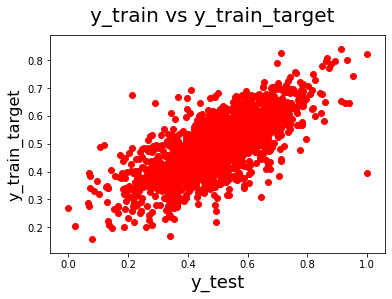

In [84]:
# Plot the scatter plot of predicted y_train_target and y_train data
fig = plt.figure()
plt.scatter(y_train,y_train_target, color='r')
fig.suptitle('y_train vs y_train_target', fontsize=20)     # Label heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_train_target', fontsize=16)                  # Y-label

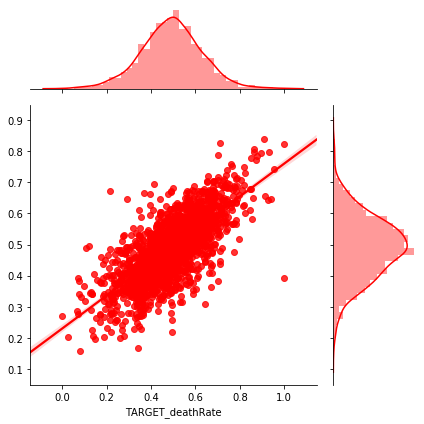

In [85]:
# Plot a jointplot between y_train_target and y_train
sns.jointplot(y_train,y_train_target, data=df_train, height=6, ratio=3,kind='reg', color='r');

# Check RMSE of model on training data set

In [86]:
from sklearn.metrics import mean_squared_error
test_set_rmse = (np.sqrt(mean_squared_error(y_train,y_train_target))).round(1)
print("RMSE:",test_set_rmse)

RMSE: 0.1


# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

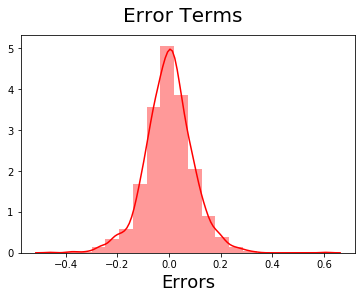

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_target), bins = 20, color='r')
fig.suptitle('Error Terms', fontsize = 20)                  # label heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

# Make Predictions
Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. eight model.

### Step 1: Scale the test data using MinMaxScaler

In [88]:
num_vars = ['avgAnnCount', 'avgDeathsPerYear', 'TARGET_deathRate', 'incidenceRate',
       'medIncome', 'popEst2015', 'povertyPercent', 'studyPerCap', 'MedianAge',
       'MedianAgeMale', 'MedianAgeFemale',  'AvgHouseholdSize',
       'PercentMarried', 'PctNoHS18_24', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctWhite', 'PctBlack', 'PctAsian', 'PctOtherRace',
       'PctMarriedHouseholds', 'BirthRate']

df_test[num_vars] = scaler.transform(df_test[num_vars])

### Step 2: Divide the testing dataset into X_test and y_test

In [89]:
y_test = df_test.pop('TARGET_deathRate')
X_test = df_test

### Step 3: Use our model to make predictions.

In [90]:
# Creating X_test_new dataframe by dropping const column from X_train_10 and 
# selecting all the columns present in X_train_10 from X_test and creating X_test_new dataframe
X_test_new = X_test[X_train_8.columns.drop('const')]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [91]:
# Making predictions
y_pred = lm8.predict(X_test_new)

# Model Evaluation
Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

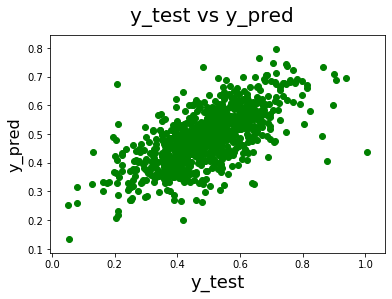

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred,color="g")
fig.suptitle('y_test vs y_pred', fontsize=20)              # Label heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

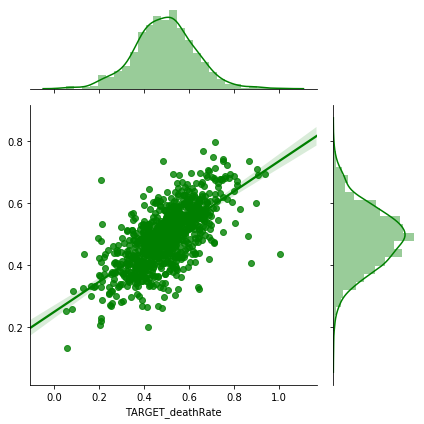

In [93]:
# Plot a jointplot for actual versus predicted values
sns.jointplot(y_test,y_pred, data=X_test_new, height=6, ratio=3, color="g",kind='reg')

# Check RMSE of model on testing data set

In [94]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, y_pred))).round(2)
print("RMSE:",test_set_rmse)

RMSE: 0.1


### We see that the model is performing good as both the RMSE( Root Mean Square Error) of trainig and testing dataset is same. 

In [95]:
lm8.params.round(3)

const                   0.531
avgAnnCount            -0.177
avgDeathsPerYear        0.236
incidenceRate           0.424
medIncome              -0.129
MedianAgeFemale        -0.046
PctHS18_24              0.084
PctBachDeg25_Over      -0.297
PctPrivateCoverage     -0.052
PctMarriedHouseholds   -0.077
dtype: float64

### We can see that the equation of our best fitted hyperplane is:

**TARGET_deathRate = 0.531 + 0.236 x avgDeathsPerYear - 0.177 x avgAnnCount  + 0.424 x incidenceRate - 0.129 x medIncome - 0.046 x MedianAgeFemale + 0.084 x PctHS18_24 - 0.297 x PctBachDeg25_Over - 0.052 x PctPrivateCoverage - 0.077 x PctMarriedHouseholds**

Overall we have a decent model, but we also acknowledge that we could do better. 

We have a couple of options:
1. Clean data deeply and handle outliers more effectively.
2. Try combinations of more new features
3. Build a non-linear model

## Thank you